In [1]:
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
assert len(physical_devices) > 0, "Not enough GPU hardware devices available"

if physical_devices:
    # Restrict Tensorflow to only use the first GPU
    try:
        for gpu in physical_devices:
            tf.config.experimental.set_memory_growth(gpu, True)
            
        tf.config.experimental.set_visible_devices(physical_devices[0], 'GPU')   
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(physical_devices), "Physical GPUs, ", len(logical_gpus), "Logical GPU")
    except RuntimeError as e:
        #Visible devices must be set before GPUs have been initialized.
        print(e)


2 Physical GPUs,  1 Logical GPU


In [2]:
from tensorflow.keras.models import Sequential
from keras import optimizers
from numpy import asarray
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense,MaxPool2D,Flatten
import pydicom
from pydicom.data import get_testdata_files
import os
import numpy as np
import os.path
import json
import random

from os import path
from matplotlib import pyplot, cm, patches


In [3]:


# Loading the Paths for the csv and Dicoms

PathDicom =os.getcwd()
lstFilesDCM = []  # create an empty list
filesDCM = []  # create an empty list
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file's DICOM
            namedir=[os.path.splitext(filename)[0],os.path.join(dirName,filename)]
            filesDCM.append(namedir)
#             lstFilesDCM.append(os.path.join(dirName,filename))
            
csvarray = []  # create an empty list
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".csv" in filename.lower():  # check whether the file's DICOM
#            print(filename)
           csvarray.append(os.path.join(dirName,filename))

In [4]:
# Loading the csv data from the paths 
import csv
c=0
lstFilesc=[]
for csvfiles in csvarray:
    with open(csvfiles,encoding='utf8') as csv_file:
        csvData=csv.DictReader(csv_file)
        for data in csvData:
                arrr=[data['File Name'],data['x Top Left'],data['y Top Left'],data['Width'],data['Height']]
                lstFilesc.append(arrr)
                print(data['File Name'])

print(len(lstFilesc)) 


S042-00187
S042-00188
S042-00189
S042-00190
S042-00191
S042-00192
S042-00193
S042-00194
S042-00195
S042-00196
S042-00197
S042-00198
S042-00199
S042-00200
S042-00201
S042-00202
S042-00203
S042-00204
S042-00205
S042-00206
S042-00207
S042-00208
S042-00209
S042-00210
S042-00211
S042-00212
S042-00213
S042-00214
S042-00215
S042-00216
S042-00217
S042-00218
S042-00219
S042-00220
S042-00221
S042-00222
S042-00223
S042-00224
S042-00225
S042-00226
S042-00227
S042-00228
S042-00229
S042-00230
S042-00231
S042-00232
S042-00233
S042-00234
S042-00235
S042-00236
S042-00237
S042-00238
S042-00239
S042-00240
S042-00241
S042-00242
S042-00243
S042-00244
S042-00245
S042-00246
S042-00247
S042-00248
S042-00249
S042-00250
S042-00251
S042-00252
S042-00253
S042-00254
S042-00255
S042-00256
S042-00257
S042-00258
S042-00259
S042-00260
S042-00261
S042-00262
S042-00263
S042-00264
S042-00265
S042-00266
S042-00267
S042-00268
S042-00269
S042-00270
S042-00271
S042-00272
S042-00273
S042-00274
S042-00275
S042-00276
S042-00277

S024-00272
S024-00273
S024-00274
S024-00275
S024-00276
S024-00277
S024-00278
S024-00279
S024-00280
S024-00281
S024-00282
S024-00283
S024-00284
S024-00285
S024-00286
S024-00287
S024-00288
S024-00289
S024-00290
S024-00291
S024-00292
S024-00293
S024-00294
S024-00295
S024-00296
S024-00297
S024-00298
S024-00299
S024-00300
S024-00301
S024-00302
S024-00303
S024-00304
S024-00305
S024-00306
S024-00307
S024-00308
S024-00309
S024-00310
S024-00311
S024-00312
S024-00313
S024-00314
S024-00315
S024-00316
S024-00317
S024-00318
S024-00319
S024-00320
S024-00321
S024-00322
S024-00323
S024-00324
S024-00325
S024-00326
S024-00327
S024-00328
S024-00329
S024-00330
S024-00331
S024-00332
S024-00333
S024-00334
S024-00335
S074-00001
S074-00002
S074-00003
S074-00004
S074-00005
S074-00006
S074-00007
S074-00008
S074-00009
S074-00010
S074-00011
S074-00012
S074-00013
S074-00014
S074-00015
S074-00016
S074-00017
S074-00018
S074-00019
S074-00020
S074-00021
S074-00022
S074-00023
S074-00024
S074-00025
S074-00026
S074-00027

S117-00142
S117-00143
S117-00144
S117-00145
S117-00146
S117-00147
S117-00148
S117-00149
S117-00150
S117-00151
S117-00152
S117-00153
S117-00154
S117-00155
S117-00156
S117-00157
S117-00158
S117-00159
S117-00160
S117-00161
S117-00162
S117-00163
S117-00164
S117-00165
S117-00166
S117-00167
S117-00168
S117-00169
S117-00170
S117-00171
S117-00172
S117-00173
S117-00174
S117-00175
S117-00176
S117-00177
S117-00178
S117-00179
S117-00180
S117-00181
S117-00182
S117-00183
S117-00184
S117-00185
S117-00186
S117-00187
S117-00188
S117-00189
S117-00190
S117-00191
S117-00192
S117-00193
S117-00194
S117-00195
S117-00196
S117-00197
S117-00198
S117-00199
S117-00200
S117-00201
S117-00202
S117-00203
S117-00204
S117-00205
S117-00206
S117-00207
S117-00208
S117-00209
S117-00210
S117-00211
S117-00212
S117-00213
S117-00214
S117-00215
S117-00216
S117-00217
S117-00218
S117-00219
S117-00220
S117-00221
S117-00222
S117-00223
S117-00224
S117-00225
S117-00226
S117-00227
S117-00228
S117-00229
S117-00230
S117-00231
S117-00232

S030-00317
S030-00318
S030-00319
S030-00320
S030-00321
S030-00322
S030-00323
S030-00324
S030-00325
S030-00326
S030-00327
S030-00328
S030-00329
S030-00330
S030-00331
S030-00332
S030-00333
S030-00334
S030-00335
S030-00336
S030-00337
S030-00338
S110-00211
S110-00212
S110-00213
S110-00214
S110-00215
S110-00216
S110-00217
S110-00218
S110-00219
S110-00220
S110-00221
S110-00222
S110-00223
S110-00224
S110-00225
S110-00226
S110-00227
S110-00228
S110-00229
S110-00230
S110-00231
S110-00232
S110-00233
S110-00234
S110-00235
S110-00236
S110-00237
S110-00238
S110-00239
S110-00240
S110-00241
S110-00242
S110-00243
S110-00244
S110-00245
S110-00246
S110-00247
S110-00248
S110-00249
S110-00250
S110-00251
S110-00252
S110-00253
S110-00254
S110-00255
S110-00256
S110-00257
S110-00258
S110-00259
S110-00260
S110-00261
S110-00262
S110-00263
S110-00264
S110-00265
S110-00266
S110-00267
S110-00268
S110-00269
S110-00270
S110-00271
S110-00272
S110-00273
S110-00274
S110-00275
S110-00276
S110-00277
S110-00278
S110-00279

S011-00297
S011-00298
S011-00299
S011-00300
S011-00301
S011-00302
S011-00303
S011-00304
S011-00305
S011-00306
S011-00307
S011-00308
S011-00309
S011-00310
S011-00311
S011-00312
S011-00313
S011-00314
S011-00315
S011-00316
S011-00317
S011-00318
S011-00319
S011-00320
S011-00321
S011-00322
S011-00323
S011-00324
S011-00325
S011-00326
S011-00327
S011-00328
S011-00329
S011-00330
S011-00331
S011-00332
S011-00333
S011-00334
S011-00335
S011-00336
S011-00337
S011-00338
S011-00339
S115-00001
S115-00002
S115-00003
S115-00004
S115-00005
S115-00006
S115-00007
S115-00008
S115-00009
S115-00010
S115-00011
S115-00012
S115-00013
S115-00014
S115-00015
S115-00016
S115-00017
S115-00018
S115-00019
S115-00020
S115-00021
S115-00022
S115-00023
S115-00024
S115-00025
S115-00026
S115-00027
S115-00028
S115-00029
S115-00030
S115-00031
S115-00032
S115-00033
S115-00034
S115-00035
S115-00036
S115-00037
S115-00038
S115-00039
S115-00040
S115-00041
S115-00042
S115-00043
S115-00044
S115-00045
S115-00046
S115-00047
S115-00048

S047-00309
S047-00310
S047-00311
S047-00312
S047-00313
S047-00314
S047-00315
S047-00316
S047-00317
S047-00318
S047-00319
S047-00320
S047-00321
S047-00322
S047-00323
S047-00324
S047-00325
S047-00326
S047-00327
S047-00328
S047-00329
S047-00330
S047-00331
S047-00332
S047-00336
S032-00003
S032-00004
S032-00005
S032-00006
S032-00007
S032-00008
S032-00009
S032-00010
S032-00011
S032-00012
S032-00013
S032-00014
S032-00015
S032-00016
S032-00017
S032-00018
S032-00019
S032-00020
S032-00021
S032-00022
S032-00023
S032-00024
S032-00025
S032-00026
S032-00027
S032-00028
S032-00029
S032-00030
S032-00031
S032-00032
S032-00033
S032-00034
S032-00035
S032-00036
S032-00037
S032-00038
S032-00039
S032-00040
S032-00041
S032-00042
S032-00043
S032-00044
S032-00045
S032-00046
S032-00047
S032-00048
S032-00049
S032-00050
S032-00051
S032-00052
S032-00053
S032-00054
S032-00055
S032-00056
S032-00057
S032-00058
S032-00059
S032-00060
S032-00061
S032-00062
S032-00063
S032-00064
S032-00065
S032-00066
S032-00067
S032-00068

S090-00297
S090-00298
S090-00299
S090-00300
S090-00301
S090-00302
S090-00303
S090-00304
S090-00305
S090-00306
S090-00307
S090-00308
S090-00309
S090-00310
S108-00044
S108-00045
S108-00046
S108-00047
S108-00048
S108-00049
S108-00050
S108-00051
S108-00052
S108-00053
S108-00054
S108-00055
S108-00056
S108-00057
S108-00058
S108-00059
S108-00060
S108-00061
S108-00062
S108-00063
S108-00064
S108-00065
S108-00066
S108-00067
S108-00068
S108-00069
S108-00070
S108-00071
S108-00072
S108-00073
S108-00074
S108-00075
S108-00076
S108-00077
S108-00078
S108-00079
S108-00080
S108-00081
S108-00082
S108-00083
S108-00084
S108-00085
S108-00086
S108-00087
S108-00088
S108-00089
S108-00090
S108-00091
S108-00092
S108-00093
S108-00094
S108-00095
S108-00096
S108-00097
S108-00098
S108-00099
S108-00100
S108-00101
S108-00102
S108-00103
S108-00104
S108-00105
S108-00106
S108-00107
S108-00108
S108-00109
S108-00110
S108-00111
S108-00112
S108-00113
S108-00114
S108-00115
S108-00116
S108-00117
S108-00118
S108-00119
S108-00120

S077-00002
S077-00003
S077-00004
S077-00005
S077-00006
S077-00007
S077-00008
S077-00009
S077-00010
S077-00011
S077-00012
S077-00013
S077-00014
S077-00015
S077-00016
S077-00017
S077-00018
S077-00019
S077-00020
S077-00021
S077-00022
S077-00023
S077-00024
S077-00025
S077-00026
S077-00027
S077-00028
S077-00029
S077-00030
S077-00031
S077-00032
S077-00033
S077-00034
S077-00035
S077-00036
S077-00037
S077-00038
S077-00039
S077-00040
S077-00041
S077-00042
S077-00043
S077-00044
S077-00045
S077-00046
S077-00047
S077-00048
S077-00049
S077-00050
S077-00051
S077-00052
S077-00053
S077-00054
S077-00055
S077-00056
S077-00057
S077-00058
S077-00059
S077-00060
S077-00061
S077-00062
S077-00063
S077-00064
S077-00065
S077-00066
S077-00067
S077-00068
S077-00069
S077-00070
S077-00071
S077-00072
S077-00073
S077-00074
S077-00075
S077-00076
S077-00077
S077-00078
S077-00079
S077-00080
S077-00081
S077-00082
S077-00083
S077-00084
S077-00085
S077-00086
S077-00087
S077-00088
S077-00089
S077-00090
S077-00091
S077-00092

S109-00001
S109-00002
S109-00003
S109-00004
S109-00005
S109-00006
S109-00007
S109-00008
S109-00009
S109-00010
S109-00011
S109-00012
S109-00013
S109-00014
S109-00015
S109-00016
S109-00017
S109-00018
S109-00019
S109-00020
S109-00021
S109-00022
S109-00023
S109-00024
S109-00025
S109-00026
S109-00027
S109-00028
S109-00029
S109-00030
S109-00031
S109-00032
S109-00033
S109-00034
S109-00035
S109-00036
S109-00037
S109-00038
S109-00039
S109-00040
S109-00041
S109-00042
S109-00043
S109-00044
S109-00045
S109-00046
S109-00047
S109-00048
S109-00049
S109-00050
S109-00051
S109-00052
S109-00053
S109-00054
S109-00055
S109-00056
S109-00057
S109-00058
S109-00059
S109-00060
S109-00061
S109-00062
S109-00063
S109-00064
S109-00065
S109-00066
S109-00067
S109-00068
S109-00069
S109-00070
S109-00071
S109-00072
S109-00073
S109-00074
S109-00075
S109-00076
S109-00077
S109-00078
S109-00079
S109-00080
S109-00081
S109-00082
S109-00083
S109-00084
S109-00085
S109-00086
S109-00087
S109-00088
S109-00089
S109-00090
S109-00091

S018-00306
S018-00307
S018-00308
S018-00309
S018-00310
S018-00311
S018-00312
S018-00313
S018-00314
S018-00315
S018-00316
S018-00317
S018-00318
S018-00319
S018-00320
S018-00321
S018-00322
S018-00323
S018-00324
S018-00325
S018-00326
S018-00327
S018-00328
S018-00329
S018-00330
S018-00331
S018-00332
S118-00001
S118-00002
S118-00003
S118-00004
S118-00005
S118-00006
S118-00007
S118-00008
S118-00009
S118-00010
S118-00011
S118-00012
S118-00013
S118-00014
S118-00015
S118-00016
S118-00017
S118-00018
S118-00019
S118-00020
S118-00021
S118-00022
S118-00023
S118-00024
S118-00025
S118-00026
S118-00027
S118-00028
S118-00029
S118-00030
S118-00031
S118-00032
S118-00033
S118-00034
S118-00035
S118-00036
S118-00037
S118-00038
S118-00039
S118-00040
S118-00041
S118-00042
S118-00043
S118-00044
S118-00045
S118-00046
S118-00047
S118-00048
S118-00049
S118-00050
S118-00051
S118-00052
S118-00053
S118-00054
S118-00055
S118-00056
S118-00057
S118-00058
S118-00059
S118-00060
S118-00061
S118-00062
S118-00063
S118-00064

S052-00255
S052-00256
S052-00257
S052-00258
S052-00259
S052-00260
S052-00261
S052-00262
S052-00263
S052-00264
S052-00265
S052-00266
S052-00267
S052-00268
S052-00269
S052-00270
S052-00271
S052-00272
S052-00273
S052-00274
S052-00275
S052-00276
S052-00277
S052-00278
S052-00279
S052-00280
S052-00281
S052-00282
S052-00283
S052-00284
S052-00285
S052-00286
S052-00287
S052-00288
S052-00289
S052-00290
S052-00291
S052-00292
S052-00293
S052-00294
S052-00295
S052-00296
S052-00297
S052-00298
S052-00299
S052-00300
S052-00301
S040-00005
S040-00006
S040-00007
S040-00008
S040-00009
S040-00010
S040-00011
S040-00012
S040-00013
S040-00014
S040-00015
S040-00016
S040-00017
S040-00018
S040-00019
S040-00020
S040-00021
S040-00022
S040-00023
S040-00024
S040-00025
S040-00026
S040-00027
S040-00028
S040-00029
S040-00030
S040-00031
S040-00032
S040-00033
S040-00034
S040-00035
S040-00036
S040-00037
S040-00038
S040-00039
S040-00040
S040-00041
S040-00042
S040-00043
S040-00044
S040-00045
S040-00046
S040-00047
S040-00048

S085-00313
S085-00314
S085-00315
S085-00316
S085-00317
S085-00318
S085-00319
S085-00320
S085-00321
S085-00322
S085-00323
S085-00324
S085-00325
S085-00326
S085-00327
S085-00328
S085-00329
S085-00330
S085-00331
S085-00332
S085-00333
S085-00334
S085-00335
S085-00336
S085-00337
S085-00338
S085-00339
S085-00340
S085-00341
S085-00342
S085-00343
S085-00344
S085-00345
S085-00346
S085-00347
S085-00348
S085-00349
S085-00350
S085-00351
S085-00352
S085-00353
S085-00354
S085-00355
S085-00356
S085-00357
S085-00358
S085-00359
S085-00360
S085-00361
S085-00362
S085-00363
S085-00364
S085-00365
S085-00366
S085-00367
S085-00368
S085-00369
S085-00370
S085-00371
S085-00372
S085-00373
S054-00001
S054-00002
S054-00003
S054-00004
S054-00005
S054-00006
S054-00007
S054-00008
S054-00009
S054-00010
S054-00011
S054-00012
S054-00013
S054-00014
S054-00015
S054-00016
S054-00017
S054-00018
S054-00019
S054-00020
S054-00021
S054-00022
S054-00023
S054-00024
S054-00025
S054-00026
S054-00027
S054-00028
S054-00029
S054-00030

S075-00345
S075-00346
S075-00347
S075-00348
S075-00349
S075-00350
S075-00351
S075-00352
S075-00353
S075-00354
S026-00053
S026-00079
S026-00080
S026-00081
S026-00082
S026-00083
S026-00084
S026-00085
S026-00086
S026-00087
S026-00088
S026-00089
S026-00090
S026-00091
S026-00092
S026-00093
S026-00094
S026-00095
S026-00096
S026-00097
S026-00098
S026-00099
S026-00100
S026-00101
S026-00102
S026-00103
S026-00104
S026-00105
S026-00106
S026-00107
S026-00108
S026-00109
S026-00110
S026-00111
S026-00112
S026-00113
S026-00114
S026-00115
S026-00116
S026-00117
S026-00118
S026-00119
S026-00120
S026-00121
S026-00122
S026-00123
S026-00124
S026-00125
S026-00126
S026-00127
S026-00128
S026-00129
S026-00130
S026-00131
S026-00132
S026-00133
S026-00134
S026-00135
S026-00136
S026-00137
S026-00138
S026-00139
S026-00140
S026-00141
S026-00142
S026-00143
S026-00144
S026-00145
S026-00146
S026-00147
S026-00148
S026-00149
S026-00150
S026-00151
S026-00152
S026-00153
S026-00154
S026-00155
S026-00156
S026-00157
S026-00158

S097-00001
S097-00002
S097-00003
S097-00004
S097-00005
S097-00006
S097-00007
S097-00008
S097-00009
S097-00010
S097-00011
S097-00012
S097-00013
S097-00014
S097-00015
S097-00016
S097-00017
S097-00018
S097-00019
S097-00020
S097-00021
S097-00022
S097-00023
S097-00024
S097-00025
S097-00026
S097-00027
S097-00028
S097-00029
S097-00030
S097-00031
S097-00032
S097-00033
S097-00034
S097-00035
S097-00036
S097-00037
S097-00038
S097-00039
S097-00040
S097-00041
S097-00042
S097-00043
S097-00044
S097-00045
S097-00046
S097-00047
S097-00048
S097-00049
S097-00050
S097-00051
S097-00052
S097-00053
S097-00054
S097-00055
S097-00056
S097-00057
S097-00058
S097-00059
S097-00060
S097-00061
S097-00062
S097-00063
S097-00064
S097-00065
S097-00066
S097-00067
S097-00068
S097-00069
S097-00070
S097-00071
S097-00072
S097-00073
S097-00074
S097-00075
S097-00076
S097-00077
S097-00078
S097-00079
S097-00080
S097-00081
S097-00082
S097-00083
S097-00084
S097-00085
S097-00086
S097-00087
S097-00088
S097-00133
S097-00134
S097-00135

In [5]:
# rearranging the data and matching them to eliminate dicoms that their csv data were not provided

lstFilesCSV=[]
c=0
for files in filesDCM:
    for data in lstFilesc:
        if files[0]== data[0]:
            c=c+1
            print(files[0],data[0],c)
            lstFilesDCM.append(files[1])
            lstFilesCSV.append(data)
            
            
            
    

S101-00139 S101-00139 1
S101-00135 S101-00135 2
S101-00090 S101-00090 3
S101-00083 S101-00083 4
S101-00075 S101-00075 5
S101-00247 S101-00247 6
S101-00037 S101-00037 7
S101-00030 S101-00030 8
S101-00242 S101-00242 9
S101-00039 S101-00039 10
S101-00243 S101-00243 11
S101-00082 S101-00082 12
S101-00055 S101-00055 13
S101-00048 S101-00048 14
S101-00021 S101-00021 15
S101-00141 S101-00141 16
S101-00142 S101-00142 17
S101-00149 S101-00149 18
S101-00155 S101-00155 19
S101-00117 S101-00117 20
S101-00059 S101-00059 21
S101-00166 S101-00166 22
S101-00046 S101-00046 23
S101-00129 S101-00129 24
S101-00063 S101-00063 25
S101-00049 S101-00049 26
S101-00053 S101-00053 27
S101-00105 S101-00105 28
S101-00197 S101-00197 29
S101-00220 S101-00220 30
S101-00146 S101-00146 31
S101-00133 S101-00133 32
S101-00061 S101-00061 33
S101-00080 S101-00080 34
S101-00168 S101-00168 35
S101-00151 S101-00151 36
S101-00040 S101-00040 37
S101-00085 S101-00085 38
S101-00227 S101-00227 39
S101-00058 S101-00058 40
S101-0019

S061-00217 S061-00217 326
S061-00051 S061-00051 327
S061-00227 S061-00227 328
S061-00287 S061-00287 329
S061-00285 S061-00285 330
S061-00215 S061-00215 331
S061-00188 S061-00188 332
S061-00136 S061-00136 333
S061-00232 S061-00232 334
S061-00092 S061-00092 335
S061-00290 S061-00290 336
S061-00239 S061-00239 337
S061-00331 S061-00331 338
S061-00278 S061-00278 339
S061-00116 S061-00116 340
S061-00291 S061-00291 341
S061-00168 S061-00168 342
S061-00304 S061-00304 343
S061-00074 S061-00074 344
S061-00233 S061-00233 345
S061-00184 S061-00184 346
S061-00298 S061-00298 347
S061-00043 S061-00043 348
S061-00206 S061-00206 349
S061-00171 S061-00171 350
S061-00111 S061-00111 351
S061-00052 S061-00052 352
S061-00098 S061-00098 353
S061-00113 S061-00113 354
S061-00212 S061-00212 355
S061-00173 S061-00173 356
S061-00205 S061-00205 357
S061-00105 S061-00105 358
S061-00053 S061-00053 359
S061-00280 S061-00280 360
S061-00160 S061-00160 361
S061-00073 S061-00073 362
S061-00248 S061-00248 363
S061-00189 S

S008-00269 S008-00269 643
S008-00169 S008-00169 644
S008-00128 S008-00128 645
S008-00100 S008-00100 646
S008-00072 S008-00072 647
S008-00147 S008-00147 648
S008-00151 S008-00151 649
S008-00206 S008-00206 650
S008-00189 S008-00189 651
S008-00111 S008-00111 652
S008-00199 S008-00199 653
S008-00113 S008-00113 654
S008-00204 S008-00204 655
S008-00217 S008-00217 656
S008-00034 S008-00034 657
S008-00237 S008-00237 658
S008-00164 S008-00164 659
S008-00050 S008-00050 660
S008-00272 S008-00272 661
S008-00155 S008-00155 662
S008-00167 S008-00167 663
S008-00063 S008-00063 664
S008-00030 S008-00030 665
S008-00290 S008-00290 666
S008-00275 S008-00275 667
S008-00239 S008-00239 668
S008-00007 S008-00007 669
S008-00171 S008-00171 670
S008-00124 S008-00124 671
S008-00263 S008-00263 672
S008-00252 S008-00252 673
S008-00158 S008-00158 674
S008-00209 S008-00209 675
S008-00018 S008-00018 676
S008-00101 S008-00101 677
S008-00194 S008-00194 678
S008-00064 S008-00064 679
S008-00091 S008-00091 680
S008-00222 S

S009-00091 S009-00091 967
S009-00108 S009-00108 968
S009-00168 S009-00168 969
S009-00230 S009-00230 970
S009-00092 S009-00092 971
S009-00037 S009-00037 972
S009-00244 S009-00244 973
S009-00265 S009-00265 974
S009-00135 S009-00135 975
S009-00072 S009-00072 976
S009-00010 S009-00010 977
S009-00185 S009-00185 978
S009-00008 S009-00008 979
S009-00214 S009-00214 980
S009-00126 S009-00126 981
S009-00227 S009-00227 982
S009-00154 S009-00154 983
S009-00173 S009-00173 984
S009-00187 S009-00187 985
S009-00001 S009-00001 986
S009-00222 S009-00222 987
S009-00252 S009-00252 988
S009-00271 S009-00271 989
S009-00220 S009-00220 990
S009-00174 S009-00174 991
S009-00058 S009-00058 992
S009-00033 S009-00033 993
S009-00160 S009-00160 994
S009-00142 S009-00142 995
S009-00248 S009-00248 996
S009-00224 S009-00224 997
S009-00240 S009-00240 998
S009-00087 S009-00087 999
S009-00190 S009-00190 1000
S009-00100 S009-00100 1001
S009-00239 S009-00239 1002
S009-00164 S009-00164 1003
S009-00269 S009-00269 1004
S009-00

S007-00097 S007-00097 1351
S007-00148 S007-00148 1352
S007-00211 S007-00211 1353
S007-00005 S007-00005 1354
S007-00147 S007-00147 1355
S007-00034 S007-00034 1356
S007-00124 S007-00124 1357
S007-00152 S007-00152 1358
S007-00069 S007-00069 1359
S007-00210 S007-00210 1360
S007-00036 S007-00036 1361
S007-00003 S007-00003 1362
S007-00172 S007-00172 1363
S007-00145 S007-00145 1364
S007-00051 S007-00051 1365
S007-00006 S007-00006 1366
S007-00203 S007-00203 1367
S007-00080 S007-00080 1368
S007-00032 S007-00032 1369
S007-00083 S007-00083 1370
S007-00174 S007-00174 1371
S007-00086 S007-00086 1372
S007-00193 S007-00193 1373
S007-00022 S007-00022 1374
S007-00098 S007-00098 1375
S007-00082 S007-00082 1376
S007-00182 S007-00182 1377
S007-00160 S007-00160 1378
S007-00106 S007-00106 1379
S007-00091 S007-00091 1380
S007-00088 S007-00088 1381
S007-00200 S007-00200 1382
S007-00140 S007-00140 1383
S007-00119 S007-00119 1384
S007-00058 S007-00058 1385
S007-00159 S007-00159 1386
S007-00190 S007-00190 1387
S

S055-00308 S055-00308 1659
S055-00011 S055-00011 1660
S055-00019 S055-00019 1661
S055-00118 S055-00118 1662
S055-00307 S055-00307 1663
S055-00190 S055-00190 1664
S055-00230 S055-00230 1665
S055-00126 S055-00126 1666
S055-00255 S055-00255 1667
S055-00177 S055-00177 1668
S055-00238 S055-00238 1669
S055-00100 S055-00100 1670
S055-00093 S055-00093 1671
S055-00267 S055-00267 1672
S055-00108 S055-00108 1673
S055-00259 S055-00259 1674
S055-00297 S055-00297 1675
S055-00075 S055-00075 1676
S055-00286 S055-00286 1677
S055-00171 S055-00171 1678
S055-00290 S055-00290 1679
S055-00046 S055-00046 1680
S055-00084 S055-00084 1681
S055-00292 S055-00292 1682
S055-00140 S055-00140 1683
S055-00315 S055-00315 1684
S055-00104 S055-00104 1685
S055-00055 S055-00055 1686
S055-00298 S055-00298 1687
S055-00007 S055-00007 1688
S055-00136 S055-00136 1689
S055-00239 S055-00239 1690
S055-00236 S055-00236 1691
S055-00116 S055-00116 1692
S055-00317 S055-00317 1693
S055-00039 S055-00039 1694
S055-00251 S055-00251 1695
S

S117-00278 S117-00278 1973
S117-00094 S117-00094 1974
S117-00054 S117-00054 1975
S117-00234 S117-00234 1976
S117-00251 S117-00251 1977
S117-00329 S117-00329 1978
S117-00121 S117-00121 1979
S117-00271 S117-00271 1980
S117-00263 S117-00263 1981
S117-00059 S117-00059 1982
S117-00288 S117-00288 1983
S117-00293 S117-00293 1984
S117-00034 S117-00034 1985
S117-00048 S117-00048 1986
S117-00159 S117-00159 1987
S117-00216 S117-00216 1988
S117-00227 S117-00227 1989
S117-00175 S117-00175 1990
S117-00137 S117-00137 1991
S117-00207 S117-00207 1992
S117-00115 S117-00115 1993
S117-00120 S117-00120 1994
S117-00232 S117-00232 1995
S117-00312 S117-00312 1996
S117-00321 S117-00321 1997
S117-00229 S117-00229 1998
S117-00150 S117-00150 1999
S117-00292 S117-00292 2000
S117-00154 S117-00154 2001
S117-00022 S117-00022 2002
S117-00325 S117-00325 2003
S117-00211 S117-00211 2004
S117-00200 S117-00200 2005
S117-00050 S117-00050 2006
S117-00276 S117-00276 2007
S117-00056 S117-00056 2008
S117-00043 S117-00043 2009
S

S092-00187 S092-00187 2297
S092-00055 S092-00055 2298
S092-00109 S092-00109 2299
S092-00276 S092-00276 2300
S092-00087 S092-00087 2301
S092-00154 S092-00154 2302
S092-00188 S092-00188 2303
S092-00129 S092-00129 2304
S092-00167 S092-00167 2305
S092-00152 S092-00152 2306
S092-00142 S092-00142 2307
S092-00184 S092-00184 2308
S092-00146 S092-00146 2309
S092-00173 S092-00173 2310
S092-00155 S092-00155 2311
S092-00122 S092-00122 2312
S092-00089 S092-00089 2313
S092-00277 S092-00277 2314
S092-00079 S092-00079 2315
S092-00118 S092-00118 2316
S092-00073 S092-00073 2317
S092-00120 S092-00120 2318
S092-00070 S092-00070 2319
S092-00077 S092-00077 2320
S092-00067 S092-00067 2321
S092-00281 S092-00281 2322
S092-00192 S092-00192 2323
S092-00231 S092-00231 2324
S092-00235 S092-00235 2325
S092-00246 S092-00246 2326
S092-00092 S092-00092 2327
S092-00244 S092-00244 2328
S092-00194 S092-00194 2329
S092-00201 S092-00201 2330
S092-00272 S092-00272 2331
S092-00224 S092-00224 2332
S092-00056 S092-00056 2333
S

S112-00258 S112-00258 2619
S112-00281 S112-00281 2620
S112-00379 S112-00379 2621
S112-00069 S112-00069 2622
S112-00064 S112-00064 2623
S112-00329 S112-00329 2624
S112-00084 S112-00084 2625
S112-00341 S112-00341 2626
S112-00002 S112-00002 2627
S112-00167 S112-00167 2628
S112-00264 S112-00264 2629
S112-00296 S112-00296 2630
S112-00378 S112-00378 2631
S112-00227 S112-00227 2632
S112-00340 S112-00340 2633
S112-00161 S112-00161 2634
S112-00247 S112-00247 2635
S112-00238 S112-00238 2636
S112-00245 S112-00245 2637
S112-00377 S112-00377 2638
S112-00235 S112-00235 2639
S112-00364 S112-00364 2640
S112-00108 S112-00108 2641
S112-00325 S112-00325 2642
S112-00351 S112-00351 2643
S112-00336 S112-00336 2644
S112-00300 S112-00300 2645
S112-00118 S112-00118 2646
S112-00083 S112-00083 2647
S112-00210 S112-00210 2648
S112-00001 S112-00001 2649
S112-00301 S112-00301 2650
S112-00093 S112-00093 2651
S112-00345 S112-00345 2652
S112-00200 S112-00200 2653
S112-00025 S112-00025 2654
S112-00013 S112-00013 2655
S

S099-00282 S099-00282 2961
S099-00149 S099-00149 2962
S099-00081 S099-00081 2963
S099-00056 S099-00056 2964
S099-00269 S099-00269 2965
S099-00211 S099-00211 2966
S099-00204 S099-00204 2967
S099-00233 S099-00233 2968
S099-00183 S099-00183 2969
S099-00133 S099-00133 2970
S099-00200 S099-00200 2971
S099-00176 S099-00176 2972
S099-00141 S099-00141 2973
S099-00247 S099-00247 2974
S099-00227 S099-00227 2975
S099-00161 S099-00161 2976
S099-00232 S099-00232 2977
S099-00034 S099-00034 2978
S099-00216 S099-00216 2979
S099-00036 S099-00036 2980
S099-00109 S099-00109 2981
S099-00069 S099-00069 2982
S099-00066 S099-00066 2983
S099-00054 S099-00054 2984
S099-00108 S099-00108 2985
S099-00218 S099-00218 2986
S099-00038 S099-00038 2987
S099-00129 S099-00129 2988
S099-00067 S099-00067 2989
S099-00111 S099-00111 2990
S099-00043 S099-00043 2991
S099-00121 S099-00121 2992
S099-00070 S099-00070 2993
S099-00114 S099-00114 2994
S099-00246 S099-00246 2995
S099-00040 S099-00040 2996
S099-00191 S099-00191 2997
S

S074-00094 S074-00094 3282
S074-00110 S074-00110 3283
S074-00016 S074-00016 3284
S074-00084 S074-00084 3285
S074-00170 S074-00170 3286
S074-00107 S074-00107 3287
S074-00253 S074-00253 3288
S074-00288 S074-00288 3289
S074-00019 S074-00019 3290
S074-00040 S074-00040 3291
S074-00246 S074-00246 3292
S074-00085 S074-00085 3293
S074-00007 S074-00007 3294
S074-00256 S074-00256 3295
S074-00087 S074-00087 3296
S074-00132 S074-00132 3297
S074-00023 S074-00023 3298
S074-00282 S074-00282 3299
S074-00060 S074-00060 3300
S074-00204 S074-00204 3301
S074-00300 S074-00300 3302
S074-00028 S074-00028 3303
S074-00251 S074-00251 3304
S074-00082 S074-00082 3305
S074-00185 S074-00185 3306
S074-00258 S074-00258 3307
S074-00121 S074-00121 3308
S074-00243 S074-00243 3309
S074-00092 S074-00092 3310
S074-00281 S074-00281 3311
S074-00075 S074-00075 3312
S074-00289 S074-00289 3313
S074-00237 S074-00237 3314
S074-00236 S074-00236 3315
S074-00058 S074-00058 3316
S074-00158 S074-00158 3317
S074-00208 S074-00208 3318
S

S013-00076 S013-00076 3595
S013-00140 S013-00140 3596
S013-00153 S013-00153 3597
S013-00197 S013-00197 3598
S013-00156 S013-00156 3599
S013-00090 S013-00090 3600
S013-00294 S013-00294 3601
S013-00089 S013-00089 3602
S013-00232 S013-00232 3603
S013-00200 S013-00200 3604
S013-00210 S013-00210 3605
S013-00051 S013-00051 3606
S013-00104 S013-00104 3607
S013-00290 S013-00290 3608
S013-00113 S013-00113 3609
S013-00027 S013-00027 3610
S013-00133 S013-00133 3611
S013-00226 S013-00226 3612
S013-00141 S013-00141 3613
S013-00137 S013-00137 3614
S013-00237 S013-00237 3615
S013-00289 S013-00289 3616
S013-00230 S013-00230 3617
S013-00022 S013-00022 3618
S013-00207 S013-00207 3619
S013-00250 S013-00250 3620
S013-00006 S013-00006 3621
S013-00110 S013-00110 3622
S013-00177 S013-00177 3623
S013-00240 S013-00240 3624
S013-00283 S013-00283 3625
S013-00149 S013-00149 3626
S013-00121 S013-00121 3627
S013-00264 S013-00264 3628
S013-00085 S013-00085 3629
S013-00136 S013-00136 3630
S013-00278 S013-00278 3631
S

S016-00141 S016-00141 3915
S016-00259 S016-00259 3916
S016-00140 S016-00140 3917
S016-00101 S016-00101 3918
S016-00095 S016-00095 3919
S016-00013 S016-00013 3920
S016-00152 S016-00152 3921
S016-00137 S016-00137 3922
S016-00129 S016-00129 3923
S016-00168 S016-00168 3924
S016-00260 S016-00260 3925
S016-00166 S016-00166 3926
S016-00230 S016-00230 3927
S016-00255 S016-00255 3928
S016-00072 S016-00072 3929
S016-00002 S016-00002 3930
S016-00232 S016-00232 3931
S016-00189 S016-00189 3932
S016-00229 S016-00229 3933
S016-00133 S016-00133 3934
S016-00065 S016-00065 3935
S016-00178 S016-00178 3936
S016-00089 S016-00089 3937
S016-00249 S016-00249 3938
S016-00085 S016-00085 3939
S016-00024 S016-00024 3940
S016-00134 S016-00134 3941
S016-00131 S016-00131 3942
S016-00070 S016-00070 3943
S016-00223 S016-00223 3944
S016-00261 S016-00261 3945
S016-00105 S016-00105 3946
S016-00091 S016-00091 3947
S016-00034 S016-00034 3948
S016-00257 S016-00257 3949
S016-00185 S016-00185 3950
S016-00211 S016-00211 3951
S

S059-00072 S059-00072 4295
S059-00158 S059-00158 4296
S059-00242 S059-00242 4297
S059-00173 S059-00173 4298
S059-00278 S059-00278 4299
S059-00249 S059-00249 4300
S059-00133 S059-00133 4301
S059-00047 S059-00047 4302
S059-00109 S059-00109 4303
S059-00125 S059-00125 4304
S059-00224 S059-00224 4305
S059-00203 S059-00203 4306
S059-00120 S059-00120 4307
S059-00031 S059-00031 4308
S059-00093 S059-00093 4309
S059-00138 S059-00138 4310
S059-00215 S059-00215 4311
S059-00175 S059-00175 4312
S059-00062 S059-00062 4313
S059-00070 S059-00070 4314
S059-00201 S059-00201 4315
S059-00209 S059-00209 4316
S059-00244 S059-00244 4317
S059-00178 S059-00178 4318
S059-00082 S059-00082 4319
S059-00089 S059-00089 4320
S059-00257 S059-00257 4321
S059-00140 S059-00140 4322
S059-00261 S059-00261 4323
S059-00104 S059-00104 4324
S059-00187 S059-00187 4325
S059-00075 S059-00075 4326
S059-00127 S059-00127 4327
S059-00114 S059-00114 4328
S059-00101 S059-00101 4329
S059-00189 S059-00189 4330
S059-00281 S059-00281 4331
S

S070-00054 S070-00054 4620
S070-00290 S070-00290 4621
S070-00243 S070-00243 4622
S070-00108 S070-00108 4623
S070-00123 S070-00123 4624
S070-00218 S070-00218 4625
S070-00203 S070-00203 4626
S070-00240 S070-00240 4627
S070-00174 S070-00174 4628
S070-00049 S070-00049 4629
S070-00122 S070-00122 4630
S070-00120 S070-00120 4631
S070-00183 S070-00183 4632
S070-00047 S070-00047 4633
S070-00191 S070-00191 4634
S070-00125 S070-00125 4635
S070-00263 S070-00263 4636
S070-00217 S070-00217 4637
S070-00202 S070-00202 4638
S070-00169 S070-00169 4639
S070-00072 S070-00072 4640
S070-00133 S070-00133 4641
S070-00066 S070-00066 4642
S070-00206 S070-00206 4643
S070-00074 S070-00074 4644
S070-00210 S070-00210 4645
S070-00207 S070-00207 4646
S070-00062 S070-00062 4647
S070-00272 S070-00272 4648
S070-00270 S070-00270 4649
S070-00280 S070-00280 4650
S070-00131 S070-00131 4651
S070-00162 S070-00162 4652
S070-00069 S070-00069 4653
S070-00159 S070-00159 4654
S070-00261 S070-00261 4655
S070-00032 S070-00032 4656
S

S071-00253 S071-00253 4958
S071-00262 S071-00262 4959
S071-00254 S071-00254 4960
S071-00203 S071-00203 4961
S071-00194 S071-00194 4962
S071-00251 S071-00251 4963
S071-00160 S071-00160 4964
S071-00103 S071-00103 4965
S071-00065 S071-00065 4966
S071-00164 S071-00164 4967
S071-00145 S071-00145 4968
S071-00003 S071-00003 4969
S071-00048 S071-00048 4970
S071-00066 S071-00066 4971
S071-00266 S071-00266 4972
S071-00076 S071-00076 4973
S071-00028 S071-00028 4974
S071-00158 S071-00158 4975
S071-00207 S071-00207 4976
S071-00202 S071-00202 4977
S071-00098 S071-00098 4978
S071-00118 S071-00118 4979
S071-00216 S071-00216 4980
S071-00121 S071-00121 4981
S071-00062 S071-00062 4982
S071-00281 S071-00281 4983
S071-00323 S071-00323 4984
S071-00049 S071-00049 4985
S071-00057 S071-00057 4986
S071-00030 S071-00030 4987
S071-00257 S071-00257 4988
S071-00077 S071-00077 4989
S071-00061 S071-00061 4990
S071-00171 S071-00171 4991
S071-00075 S071-00075 4992
S071-00016 S071-00016 4993
S071-00237 S071-00237 4994
S

S076-00299 S076-00299 5275
S076-00323 S076-00323 5276
S076-00035 S076-00035 5277
S076-00319 S076-00319 5278
S076-00103 S076-00103 5279
S076-00218 S076-00218 5280
S076-00194 S076-00194 5281
S076-00331 S076-00331 5282
S076-00206 S076-00206 5283
S076-00310 S076-00310 5284
S076-00181 S076-00181 5285
S076-00330 S076-00330 5286
S076-00201 S076-00201 5287
S076-00097 S076-00097 5288
S076-00236 S076-00236 5289
S076-00229 S076-00229 5290
S076-00247 S076-00247 5291
S076-00079 S076-00079 5292
S076-00031 S076-00031 5293
S076-00059 S076-00059 5294
S076-00223 S076-00223 5295
S076-00047 S076-00047 5296
S076-00284 S076-00284 5297
S076-00264 S076-00264 5298
S076-00124 S076-00124 5299
S076-00344 S076-00344 5300
S076-00190 S076-00190 5301
S076-00197 S076-00197 5302
S076-00230 S076-00230 5303
S076-00161 S076-00161 5304
S076-00037 S076-00037 5305
S076-00039 S076-00039 5306
S076-00232 S076-00232 5307
S076-00186 S076-00186 5308
S076-00295 S076-00295 5309
S076-00155 S076-00155 5310
S076-00303 S076-00303 5311
S

S035-00063 S035-00063 5609
S035-00023 S035-00023 5610
S035-00247 S035-00247 5611
S035-00108 S035-00108 5612
S035-00102 S035-00102 5613
S035-00152 S035-00152 5614
S035-00190 S035-00190 5615
S035-00006 S035-00006 5616
S035-00246 S035-00246 5617
S035-00233 S035-00233 5618
S035-00238 S035-00238 5619
S035-00002 S035-00002 5620
S035-00060 S035-00060 5621
S035-00025 S035-00025 5622
S035-00174 S035-00174 5623
S035-00261 S035-00261 5624
S035-00096 S035-00096 5625
S035-00236 S035-00236 5626
S035-00199 S035-00199 5627
S035-00207 S035-00207 5628
S035-00229 S035-00229 5629
S035-00187 S035-00187 5630
S035-00057 S035-00057 5631
S035-00031 S035-00031 5632
S035-00182 S035-00182 5633
S035-00081 S035-00081 5634
S035-00217 S035-00217 5635
S035-00266 S035-00266 5636
S035-00241 S035-00241 5637
S035-00080 S035-00080 5638
S035-00136 S035-00136 5639
S035-00262 S035-00262 5640
S035-00058 S035-00058 5641
S035-00161 S035-00161 5642
S035-00077 S035-00077 5643
S035-00212 S035-00212 5644
S035-00078 S035-00078 5645
S

S025-00319 S025-00319 5916
S025-00177 S025-00177 5917
S025-00282 S025-00282 5918
S025-00207 S025-00207 5919
S025-00256 S025-00256 5920
S025-00460 S025-00460 5921
S025-00176 S025-00176 5922
S025-00461 S025-00461 5923
S025-00403 S025-00403 5924
S025-00312 S025-00312 5925
S025-00443 S025-00443 5926
S025-00350 S025-00350 5927
S025-00272 S025-00272 5928
S025-00309 S025-00309 5929
S025-00320 S025-00320 5930
S025-00246 S025-00246 5931
S025-00285 S025-00285 5932
S025-00276 S025-00276 5933
S025-00427 S025-00427 5934
S025-00286 S025-00286 5935
S025-00407 S025-00407 5936
S025-00389 S025-00389 5937
S025-00197 S025-00197 5938
S025-00181 S025-00181 5939
S025-00464 S025-00464 5940
S025-00193 S025-00193 5941
S025-00265 S025-00265 5942
S025-00340 S025-00340 5943
S025-00358 S025-00358 5944
S025-00243 S025-00243 5945
S025-00419 S025-00419 5946
S025-00290 S025-00290 5947
S025-00263 S025-00263 5948
S025-00361 S025-00361 5949
S025-00457 S025-00457 5950
S025-00328 S025-00328 5951
S025-00374 S025-00374 5952
S

S041-00271 S041-00271 6227
S041-00187 S041-00187 6228
S041-00226 S041-00226 6229
S041-00191 S041-00191 6230
S041-00052 S041-00052 6231
S041-00009 S041-00009 6232
S041-00259 S041-00259 6233
S041-00122 S041-00122 6234
S041-00164 S041-00164 6235
S041-00027 S041-00027 6236
S041-00050 S041-00050 6237
S041-00288 S041-00288 6238
S041-00230 S041-00230 6239
S041-00207 S041-00207 6240
S041-00032 S041-00032 6241
S041-00092 S041-00092 6242
S041-00264 S041-00264 6243
S041-00137 S041-00137 6244
S041-00061 S041-00061 6245
S041-00037 S041-00037 6246
S041-00118 S041-00118 6247
S041-00247 S041-00247 6248
S041-00085 S041-00085 6249
S041-00292 S041-00292 6250
S041-00063 S041-00063 6251
S041-00017 S041-00017 6252
S041-00012 S041-00012 6253
S041-00156 S041-00156 6254
S041-00014 S041-00014 6255
S041-00331 S041-00331 6256
S041-00278 S041-00278 6257
S041-00194 S041-00194 6258
S041-00243 S041-00243 6259
S041-00152 S041-00152 6260
S041-00322 S041-00322 6261
S041-00099 S041-00099 6262
S041-00145 S041-00145 6263
S

S027-00064 S027-00064 6567
S027-00250 S027-00250 6568
S027-00189 S027-00189 6569
S027-00216 S027-00216 6570
S027-00057 S027-00057 6571
S027-00124 S027-00124 6572
S027-00049 S027-00049 6573
S027-00125 S027-00125 6574
S027-00160 S027-00160 6575
S027-00120 S027-00120 6576
S027-00244 S027-00244 6577
S027-00233 S027-00233 6578
S027-00271 S027-00271 6579
S027-00181 S027-00181 6580
S027-00215 S027-00215 6581
S027-00199 S027-00199 6582
S027-00103 S027-00103 6583
S027-00074 S027-00074 6584
S027-00069 S027-00069 6585
S027-00254 S027-00254 6586
S027-00068 S027-00068 6587
S027-00073 S027-00073 6588
S027-00128 S027-00128 6589
S027-00255 S027-00255 6590
S027-00095 S027-00095 6591
S027-00017 S027-00017 6592
S077-00222 S077-00222 6593
S077-00276 S077-00276 6594
S077-00048 S077-00048 6595
S077-00194 S077-00194 6596
S077-00157 S077-00157 6597
S077-00173 S077-00173 6598
S077-00250 S077-00250 6599
S077-00208 S077-00208 6600
S077-00231 S077-00231 6601
S077-00235 S077-00235 6602
S077-00114 S077-00114 6603
S

S048-00145 S048-00145 6911
S048-00159 S048-00159 6912
S048-00203 S048-00203 6913
S048-00099 S048-00099 6914
S048-00086 S048-00086 6915
S048-00208 S048-00208 6916
S048-00096 S048-00096 6917
S048-00216 S048-00216 6918
S048-00047 S048-00047 6919
S048-00006 S048-00006 6920
S048-00134 S048-00134 6921
S048-00062 S048-00062 6922
S048-00148 S048-00148 6923
S048-00005 S048-00005 6924
S048-00245 S048-00245 6925
S048-00168 S048-00168 6926
S048-00235 S048-00235 6927
S048-00212 S048-00212 6928
S048-00085 S048-00085 6929
S048-00100 S048-00100 6930
S048-00130 S048-00130 6931
S048-00152 S048-00152 6932
S048-00016 S048-00016 6933
S048-00255 S048-00255 6934
S048-00171 S048-00171 6935
S048-00185 S048-00185 6936
S048-00037 S048-00037 6937
S048-00261 S048-00261 6938
S048-00014 S048-00014 6939
S048-00056 S048-00056 6940
S048-00222 S048-00222 6941
S048-00080 S048-00080 6942
S048-00184 S048-00184 6943
S048-00230 S048-00230 6944
S048-00196 S048-00196 6945
S048-00183 S048-00183 6946
S048-00116 S048-00116 6947
S

S053-00027 S053-00027 7281
S053-00228 S053-00228 7282
S053-00096 S053-00096 7283
S053-00253 S053-00253 7284
S053-00162 S053-00162 7285
S053-00092 S053-00092 7286
S053-00073 S053-00073 7287
S053-00159 S053-00159 7288
S053-00242 S053-00242 7289
S053-00024 S053-00024 7290
S053-00071 S053-00071 7291
S053-00150 S053-00150 7292
S053-00051 S053-00051 7293
S053-00187 S053-00187 7294
S053-00115 S053-00115 7295
S053-00046 S053-00046 7296
S053-00025 S053-00025 7297
S053-00175 S053-00175 7298
S053-00099 S053-00099 7299
S053-00018 S053-00018 7300
S053-00191 S053-00191 7301
S053-00146 S053-00146 7302
S053-00219 S053-00219 7303
S053-00232 S053-00232 7304
S053-00139 S053-00139 7305
S053-00208 S053-00208 7306
S053-00097 S053-00097 7307
S053-00243 S053-00243 7308
S053-00058 S053-00058 7309
S053-00226 S053-00226 7310
S053-00086 S053-00086 7311
S053-00093 S053-00093 7312
S053-00072 S053-00072 7313
S053-00203 S053-00203 7314
S053-00135 S053-00135 7315
S053-00026 S053-00026 7316
S053-00218 S053-00218 7317
S

S073-00226 S073-00226 7653
S073-00102 S073-00102 7654
S073-00036 S073-00036 7655
S073-00291 S073-00291 7656
S073-00250 S073-00250 7657
S073-00282 S073-00282 7658
S073-00208 S073-00208 7659
S073-00047 S073-00047 7660
S073-00037 S073-00037 7661
S073-00213 S073-00213 7662
S073-00180 S073-00180 7663
S073-00134 S073-00134 7664
S073-00268 S073-00268 7665
S073-00049 S073-00049 7666
S073-00024 S073-00024 7667
S073-00259 S073-00259 7668
S073-00061 S073-00061 7669
S073-00080 S073-00080 7670
S073-00141 S073-00141 7671
S073-00179 S073-00179 7672
S073-00304 S073-00304 7673
S100-00168 S100-00168 7674
S100-00193 S100-00193 7675
S100-00048 S100-00048 7676
S100-00245 S100-00245 7677
S100-00115 S100-00115 7678
S100-00166 S100-00166 7679
S100-00090 S100-00090 7680
S100-00057 S100-00057 7681
S100-00257 S100-00257 7682
S100-00208 S100-00208 7683
S100-00095 S100-00095 7684
S100-00152 S100-00152 7685
S100-00285 S100-00285 7686
S100-00249 S100-00249 7687
S100-00174 S100-00174 7688
S100-00062 S100-00062 7689
S

S036-00130 S036-00130 7976
S036-00108 S036-00108 7977
S036-00036 S036-00036 7978
S036-00152 S036-00152 7979
S036-00017 S036-00017 7980
S036-00040 S036-00040 7981
S036-00141 S036-00141 7982
S036-00037 S036-00037 7983
S036-00133 S036-00133 7984
S036-00021 S036-00021 7985
S036-00010 S036-00010 7986
S036-00014 S036-00014 7987
S036-00131 S036-00131 7988
S036-00003 S036-00003 7989
S036-00030 S036-00030 7990
S036-00060 S036-00060 7991
S036-00058 S036-00058 7992
S036-00135 S036-00135 7993
S036-00034 S036-00034 7994
S036-00048 S036-00048 7995
S036-00047 S036-00047 7996
S036-00123 S036-00123 7997
S036-00066 S036-00066 7998
S036-00049 S036-00049 7999
S036-00113 S036-00113 8000
S036-00106 S036-00106 8001
S036-00074 S036-00074 8002
S036-00079 S036-00079 8003
S036-00052 S036-00052 8004
S036-00162 S036-00162 8005
S036-00110 S036-00110 8006
S036-00116 S036-00116 8007
S036-00001 S036-00001 8008
S036-00084 S036-00084 8009
S036-00144 S036-00144 8010
S036-00117 S036-00117 8011
S036-00055 S036-00055 8012
S

S024-00170 S024-00170 8296
S024-00320 S024-00320 8297
S024-00283 S024-00283 8298
S024-00152 S024-00152 8299
S024-00301 S024-00301 8300
S024-00225 S024-00225 8301
S024-00155 S024-00155 8302
S024-00089 S024-00089 8303
S024-00307 S024-00307 8304
S024-00224 S024-00224 8305
S024-00012 S024-00012 8306
S024-00319 S024-00319 8307
S024-00254 S024-00254 8308
S024-00209 S024-00209 8309
S024-00092 S024-00092 8310
S024-00026 S024-00026 8311
S024-00020 S024-00020 8312
S024-00274 S024-00274 8313
S024-00212 S024-00212 8314
S024-00223 S024-00223 8315
S024-00029 S024-00029 8316
S024-00160 S024-00160 8317
S024-00036 S024-00036 8318
S024-00171 S024-00171 8319
S024-00204 S024-00204 8320
S024-00177 S024-00177 8321
S024-00078 S024-00078 8322
S024-00068 S024-00068 8323
S024-00195 S024-00195 8324
S024-00169 S024-00169 8325
S024-00328 S024-00328 8326
S024-00295 S024-00295 8327
S024-00131 S024-00131 8328
S024-00206 S024-00206 8329
S024-00264 S024-00264 8330
S024-00072 S024-00072 8331
S024-00308 S024-00308 8332
S

S022-00397 S022-00397 8632
S022-00444 S022-00444 8633
S022-00447 S022-00447 8634
S022-00426 S022-00426 8635
S022-00495 S022-00495 8636
S022-00236 S022-00236 8637
S022-00423 S022-00423 8638
S022-00265 S022-00265 8639
S022-00416 S022-00416 8640
S022-00530 S022-00530 8641
S022-00394 S022-00394 8642
S022-00492 S022-00492 8643
S022-00442 S022-00442 8644
S022-00443 S022-00443 8645
S022-00404 S022-00404 8646
S022-00302 S022-00302 8647
S022-00493 S022-00493 8648
S022-00516 S022-00516 8649
S022-00481 S022-00481 8650
S022-00420 S022-00420 8651
S022-00441 S022-00441 8652
S022-00385 S022-00385 8653
S022-00479 S022-00479 8654
S022-00364 S022-00364 8655
S022-00497 S022-00497 8656
S022-00348 S022-00348 8657
S022-00224 S022-00224 8658
S022-00535 S022-00535 8659
S022-00454 S022-00454 8660
S022-00531 S022-00531 8661
S022-00355 S022-00355 8662
S022-00519 S022-00519 8663
S022-00353 S022-00353 8664
S022-00415 S022-00415 8665
S022-00332 S022-00332 8666
S022-00240 S022-00240 8667
S022-00446 S022-00446 8668
S

S062-00224 S062-00224 8966
S062-00110 S062-00110 8967
S062-00145 S062-00145 8968
S062-00131 S062-00131 8969
S062-00275 S062-00275 8970
S062-00250 S062-00250 8971
S062-00267 S062-00267 8972
S062-00159 S062-00159 8973
S062-00169 S062-00169 8974
S062-00130 S062-00130 8975
S062-00315 S062-00315 8976
S062-00065 S062-00065 8977
S062-00260 S062-00260 8978
S062-00097 S062-00097 8979
S062-00222 S062-00222 8980
S062-00104 S062-00104 8981
S062-00120 S062-00120 8982
S062-00241 S062-00241 8983
S062-00302 S062-00302 8984
S062-00182 S062-00182 8985
S062-00277 S062-00277 8986
S062-00094 S062-00094 8987
S062-00074 S062-00074 8988
S062-00189 S062-00189 8989
S062-00272 S062-00272 8990
S062-00229 S062-00229 8991
S062-00190 S062-00190 8992
S062-00256 S062-00256 8993
S062-00061 S062-00061 8994
S062-00160 S062-00160 8995
S062-00223 S062-00223 8996
S062-00069 S062-00069 8997
S062-00101 S062-00101 8998
S062-00117 S062-00117 8999
S062-00299 S062-00299 9000
S062-00194 S062-00194 9001
S062-00192 S062-00192 9002
S

S113-00304 S113-00304 9296
S113-00058 S113-00058 9297
S113-00256 S113-00256 9298
S113-00093 S113-00093 9299
S113-00073 S113-00073 9300
S113-00251 S113-00251 9301
S028-00255 S028-00255 9302
S028-00264 S028-00264 9303
S028-00204 S028-00204 9304
S028-00184 S028-00184 9305
S028-00216 S028-00216 9306
S028-00065 S028-00065 9307
S028-00050 S028-00050 9308
S028-00175 S028-00175 9309
S028-00026 S028-00026 9310
S028-00168 S028-00168 9311
S028-00225 S028-00225 9312
S028-00045 S028-00045 9313
S028-00183 S028-00183 9314
S028-00004 S028-00004 9315
S028-00128 S028-00128 9316
S028-00116 S028-00116 9317
S028-00194 S028-00194 9318
S028-00260 S028-00260 9319
S028-00188 S028-00188 9320
S028-00107 S028-00107 9321
S028-00202 S028-00202 9322
S028-00137 S028-00137 9323
S028-00229 S028-00229 9324
S028-00021 S028-00021 9325
S028-00064 S028-00064 9326
S028-00054 S028-00054 9327
S028-00182 S028-00182 9328
S028-00049 S028-00049 9329
S028-00157 S028-00157 9330
S028-00161 S028-00161 9331
S028-00167 S028-00167 9332
S

S118-00073 S118-00073 9608
S118-00084 S118-00084 9609
S118-00005 S118-00005 9610
S118-00023 S118-00023 9611
S118-00160 S118-00160 9612
S118-00076 S118-00076 9613
S118-00195 S118-00195 9614
S118-00153 S118-00153 9615
S118-00053 S118-00053 9616
S118-00200 S118-00200 9617
S118-00161 S118-00161 9618
S118-00197 S118-00197 9619
S118-00083 S118-00083 9620
S118-00169 S118-00169 9621
S118-00128 S118-00128 9622
S118-00081 S118-00081 9623
S118-00035 S118-00035 9624
S118-00285 S118-00285 9625
S118-00272 S118-00272 9626
S118-00116 S118-00116 9627
S118-00007 S118-00007 9628
S118-00299 S118-00299 9629
S118-00155 S118-00155 9630
S118-00256 S118-00256 9631
S118-00228 S118-00228 9632
S118-00157 S118-00157 9633
S118-00142 S118-00142 9634
S118-00296 S118-00296 9635
S118-00220 S118-00220 9636
S118-00138 S118-00138 9637
S118-00055 S118-00055 9638
S118-00069 S118-00069 9639
S118-00107 S118-00107 9640
S118-00126 S118-00126 9641
S118-00226 S118-00226 9642
S118-00192 S118-00192 9643
S118-00241 S118-00241 9644
S

S004-00135 S004-00135 9929
S004-00129 S004-00129 9930
S004-00082 S004-00082 9931
S004-00109 S004-00109 9932
S004-00055 S004-00055 9933
S004-00054 S004-00054 9934
S004-00209 S004-00209 9935
S004-00117 S004-00117 9936
S004-00061 S004-00061 9937
S004-00188 S004-00188 9938
S004-00241 S004-00241 9939
S004-00089 S004-00089 9940
S004-00236 S004-00236 9941
S004-00045 S004-00045 9942
S004-00225 S004-00225 9943
S004-00049 S004-00049 9944
S004-00031 S004-00031 9945
S004-00224 S004-00224 9946
S004-00193 S004-00193 9947
S004-00027 S004-00027 9948
S004-00197 S004-00197 9949
S004-00062 S004-00062 9950
S004-00037 S004-00037 9951
S004-00021 S004-00021 9952
S004-00101 S004-00101 9953
S004-00001 S004-00001 9954
S004-00243 S004-00243 9955
S004-00013 S004-00013 9956
S004-00067 S004-00067 9957
S004-00226 S004-00226 9958
S004-00142 S004-00142 9959
S004-00208 S004-00208 9960
S004-00207 S004-00207 9961
S004-00009 S004-00009 9962
S004-00126 S004-00126 9963
S004-00163 S004-00163 9964
S004-00171 S004-00171 9965
S

S090-00210 S090-00210 10264
S090-00198 S090-00198 10265
S090-00094 S090-00094 10266
S090-00114 S090-00114 10267
S090-00100 S090-00100 10268
S090-00122 S090-00122 10269
S090-00120 S090-00120 10270
S090-00310 S090-00310 10271
S090-00226 S090-00226 10272
S090-00046 S090-00046 10273
S090-00309 S090-00309 10274
S090-00024 S090-00024 10275
S090-00185 S090-00185 10276
S090-00276 S090-00276 10277
S090-00083 S090-00083 10278
S090-00121 S090-00121 10279
S090-00038 S090-00038 10280
S090-00202 S090-00202 10281
S090-00218 S090-00218 10282
S090-00084 S090-00084 10283
S090-00271 S090-00271 10284
S090-00224 S090-00224 10285
S090-00002 S090-00002 10286
S090-00125 S090-00125 10287
S090-00305 S090-00305 10288
S090-00250 S090-00250 10289
S090-00287 S090-00287 10290
S090-00157 S090-00157 10291
S090-00076 S090-00076 10292
S090-00011 S090-00011 10293
S090-00031 S090-00031 10294
S090-00150 S090-00150 10295
S090-00159 S090-00159 10296
S090-00199 S090-00199 10297
S090-00098 S090-00098 10298
S090-00278 S090-0027

S049-00008 S049-00008 10557
S049-00282 S049-00282 10558
S049-00136 S049-00136 10559
S049-00227 S049-00227 10560
S049-00039 S049-00039 10561
S049-00102 S049-00102 10562
S049-00093 S049-00093 10563
S049-00232 S049-00232 10564
S049-00183 S049-00183 10565
S049-00188 S049-00188 10566
S049-00146 S049-00146 10567
S049-00283 S049-00283 10568
S049-00097 S049-00097 10569
S049-00242 S049-00242 10570
S049-00141 S049-00141 10571
S049-00207 S049-00207 10572
S049-00250 S049-00250 10573
S049-00090 S049-00090 10574
S049-00157 S049-00157 10575
S049-00269 S049-00269 10576
S049-00164 S049-00164 10577
S049-00108 S049-00108 10578
S049-00193 S049-00193 10579
S049-00245 S049-00245 10580
S049-00116 S049-00116 10581
S049-00162 S049-00162 10582
S049-00281 S049-00281 10583
S049-00140 S049-00140 10584
S049-00262 S049-00262 10585
S049-00214 S049-00214 10586
S049-00133 S049-00133 10587
S049-00014 S049-00014 10588
S049-00109 S049-00109 10589
S049-00020 S049-00020 10590
S049-00151 S049-00151 10591
S049-00041 S049-0004

S097-00222 S097-00222 10878
S097-00060 S097-00060 10879
S097-00292 S097-00292 10880
S097-00324 S097-00324 10881
S097-00030 S097-00030 10882
S097-00350 S097-00350 10883
S097-00013 S097-00013 10884
S097-00198 S097-00198 10885
S097-00307 S097-00307 10886
S097-00195 S097-00195 10887
S097-00285 S097-00285 10888
S097-00085 S097-00085 10889
S097-00064 S097-00064 10890
S097-00169 S097-00169 10891
S097-00177 S097-00177 10892
S097-00161 S097-00161 10893
S097-00164 S097-00164 10894
S097-00056 S097-00056 10895
S097-00213 S097-00213 10896
S097-00011 S097-00011 10897
S097-00193 S097-00193 10898
S097-00300 S097-00300 10899
S097-00304 S097-00304 10900
S097-00016 S097-00016 10901
S097-00233 S097-00233 10902
S097-00032 S097-00032 10903
S097-00162 S097-00162 10904
S097-00153 S097-00153 10905
S097-00058 S097-00058 10906
S097-00150 S097-00150 10907
S097-00184 S097-00184 10908
S097-00168 S097-00168 10909
S097-00001 S097-00001 10910
S097-00028 S097-00028 10911
S097-00326 S097-00326 10912
S097-00257 S097-0025

S039-00330 S039-00330 11188
S039-00183 S039-00183 11189
S039-00341 S039-00341 11190
S039-00108 S039-00108 11191
S039-00006 S039-00006 11192
S039-00349 S039-00349 11193
S039-00262 S039-00262 11194
S039-00232 S039-00232 11195
S039-00209 S039-00209 11196
S039-00175 S039-00175 11197
S039-00224 S039-00224 11198
S039-00320 S039-00320 11199
S039-00270 S039-00270 11200
S039-00274 S039-00274 11201
S039-00228 S039-00228 11202
S039-00187 S039-00187 11203
S039-00070 S039-00070 11204
S039-00050 S039-00050 11205
S039-00203 S039-00203 11206
S039-00040 S039-00040 11207
S039-00086 S039-00086 11208
S039-00157 S039-00157 11209
S039-00200 S039-00200 11210
S039-00080 S039-00080 11211
S039-00129 S039-00129 11212
S039-00318 S039-00318 11213
S039-00115 S039-00115 11214
S039-00245 S039-00245 11215
S039-00079 S039-00079 11216
S039-00246 S039-00246 11217
S039-00149 S039-00149 11218
S039-00019 S039-00019 11219
S039-00193 S039-00193 11220
S039-00162 S039-00162 11221
S039-00332 S039-00332 11222
S039-00207 S039-0020

S086-00018 S086-00018 11488
S086-00143 S086-00143 11489
S086-00167 S086-00167 11490
S086-00129 S086-00129 11491
S086-00025 S086-00025 11492
S086-00246 S086-00246 11493
S086-00247 S086-00247 11494
S086-00089 S086-00089 11495
S086-00090 S086-00090 11496
S086-00110 S086-00110 11497
S086-00280 S086-00280 11498
S086-00103 S086-00103 11499
S086-00041 S086-00041 11500
S086-00142 S086-00142 11501
S086-00065 S086-00065 11502
S086-00226 S086-00226 11503
S086-00031 S086-00031 11504
S086-00148 S086-00148 11505
S086-00228 S086-00228 11506
S086-00192 S086-00192 11507
S086-00009 S086-00009 11508
S086-00245 S086-00245 11509
S086-00222 S086-00222 11510
S086-00027 S086-00027 11511
S086-00105 S086-00105 11512
S086-00319 S086-00319 11513
S086-00068 S086-00068 11514
S086-00155 S086-00155 11515
S086-00117 S086-00117 11516
S086-00199 S086-00199 11517
S086-00028 S086-00028 11518
S086-00101 S086-00101 11519
S086-00323 S086-00323 11520
S086-00099 S086-00099 11521
S086-00310 S086-00310 11522
S086-00086 S086-0008

S087-00230 S087-00230 11781
S087-00206 S087-00206 11782
S087-00198 S087-00198 11783
S087-00286 S087-00286 11784
S087-00309 S087-00309 11785
S087-00130 S087-00130 11786
S087-00065 S087-00065 11787
S087-00127 S087-00127 11788
S087-00200 S087-00200 11789
S087-00074 S087-00074 11790
S087-00263 S087-00263 11791
S087-00149 S087-00149 11792
S087-00287 S087-00287 11793
S087-00292 S087-00292 11794
S087-00117 S087-00117 11795
S087-00237 S087-00237 11796
S087-00054 S087-00054 11797
S087-00140 S087-00140 11798
S087-00153 S087-00153 11799
S087-00151 S087-00151 11800
S087-00136 S087-00136 11801
S087-00274 S087-00274 11802
S087-00186 S087-00186 11803
S087-00134 S087-00134 11804
S087-00319 S087-00319 11805
S087-00143 S087-00143 11806
S087-00165 S087-00165 11807
S087-00236 S087-00236 11808
S087-00321 S087-00321 11809
S087-00275 S087-00275 11810
S087-00300 S087-00300 11811
S087-00049 S087-00049 11812
S087-00294 S087-00294 11813
S087-00335 S087-00335 11814
S087-00226 S087-00226 11815
S087-00289 S087-0028

S043-00054 S043-00054 12120
S043-00074 S043-00074 12121
S043-00186 S043-00186 12122
S043-00051 S043-00051 12123
S043-00145 S043-00145 12124
S043-00013 S043-00013 12125
S043-00274 S043-00274 12126
S043-00259 S043-00259 12127
S043-00228 S043-00228 12128
S043-00234 S043-00234 12129
S043-00201 S043-00201 12130
S043-00178 S043-00178 12131
S043-00069 S043-00069 12132
S043-00207 S043-00207 12133
S043-00154 S043-00154 12134
S043-00213 S043-00213 12135
S043-00281 S043-00281 12136
S043-00167 S043-00167 12137
S043-00032 S043-00032 12138
S043-00068 S043-00068 12139
S043-00239 S043-00239 12140
S043-00275 S043-00275 12141
S043-00206 S043-00206 12142
S043-00148 S043-00148 12143
S043-00076 S043-00076 12144
S043-00231 S043-00231 12145
S043-00130 S043-00130 12146
S043-00241 S043-00241 12147
S043-00226 S043-00226 12148
S043-00256 S043-00256 12149
S043-00106 S043-00106 12150
S043-00025 S043-00025 12151
S043-00089 S043-00089 12152
S043-00034 S043-00034 12153
S043-00134 S043-00134 12154
S043-00098 S043-0009

S020-00120 S020-00120 12416
S020-00143 S020-00143 12417
S020-00193 S020-00193 12418
S020-00166 S020-00166 12419
S020-00354 S020-00354 12420
S020-00139 S020-00139 12421
S020-00328 S020-00328 12422
S020-00183 S020-00183 12423
S020-00272 S020-00272 12424
S020-00281 S020-00281 12425
S020-00311 S020-00311 12426
S020-00326 S020-00326 12427
S020-00217 S020-00217 12428
S020-00265 S020-00265 12429
S020-00248 S020-00248 12430
S020-00214 S020-00214 12431
S020-00349 S020-00349 12432
S020-00123 S020-00123 12433
S020-00181 S020-00181 12434
S020-00133 S020-00133 12435
S020-00363 S020-00363 12436
S020-00274 S020-00274 12437
S020-00273 S020-00273 12438
S020-00237 S020-00237 12439
S020-00372 S020-00372 12440
S020-00353 S020-00353 12441
S020-00091 S020-00091 12442
S020-00267 S020-00267 12443
S020-00315 S020-00315 12444
S020-00097 S020-00097 12445
S020-00101 S020-00101 12446
S020-00278 S020-00278 12447
S020-00215 S020-00215 12448
S020-00165 S020-00165 12449
S020-00321 S020-00321 12450
S020-00222 S020-0022

S082-00333 S082-00333 12722
S082-00037 S082-00037 12723
S082-00027 S082-00027 12724
S082-00163 S082-00163 12725
S082-00222 S082-00222 12726
S082-00236 S082-00236 12727
S082-00140 S082-00140 12728
S082-00212 S082-00212 12729
S082-00030 S082-00030 12730
S082-00255 S082-00255 12731
S082-00062 S082-00062 12732
S082-00290 S082-00290 12733
S082-00251 S082-00251 12734
S082-00293 S082-00293 12735
S082-00127 S082-00127 12736
S082-00327 S082-00327 12737
S082-00132 S082-00132 12738
S082-00220 S082-00220 12739
S082-00322 S082-00322 12740
S082-00326 S082-00326 12741
S082-00110 S082-00110 12742
S082-00193 S082-00193 12743
S082-00269 S082-00269 12744
S082-00246 S082-00246 12745
S082-00092 S082-00092 12746
S082-00200 S082-00200 12747
S082-00079 S082-00079 12748
S082-00330 S082-00330 12749
S082-00053 S082-00053 12750
S082-00139 S082-00139 12751
S082-00204 S082-00204 12752
S082-00285 S082-00285 12753
S082-00260 S082-00260 12754
S082-00245 S082-00245 12755
S082-00107 S082-00107 12756
S082-00225 S082-0022

S037-00086 S037-00086 13033
S037-00200 S037-00200 13034
S037-00252 S037-00252 13035
S037-00251 S037-00251 13036
S037-00211 S037-00211 13037
S037-00247 S037-00247 13038
S037-00113 S037-00113 13039
S037-00013 S037-00013 13040
S037-00058 S037-00058 13041
S037-00098 S037-00098 13042
S037-00164 S037-00164 13043
S037-00109 S037-00109 13044
S037-00025 S037-00025 13045
S037-00189 S037-00189 13046
S037-00091 S037-00091 13047
S037-00097 S037-00097 13048
S037-00138 S037-00138 13049
S037-00202 S037-00202 13050
S037-00170 S037-00170 13051
S037-00034 S037-00034 13052
S037-00103 S037-00103 13053
S037-00159 S037-00159 13054
S037-00237 S037-00237 13055
S037-00107 S037-00107 13056
S037-00115 S037-00115 13057
S037-00226 S037-00226 13058
S037-00205 S037-00205 13059
S037-00140 S037-00140 13060
S037-00023 S037-00023 13061
S037-00082 S037-00082 13062
S037-00071 S037-00071 13063
S037-00042 S037-00042 13064
S037-00208 S037-00208 13065
S037-00114 S037-00114 13066
S037-00032 S037-00032 13067
S037-00212 S037-0021

S115-00042 S115-00042 13364
S115-00131 S115-00131 13365
S115-00288 S115-00288 13366
S115-00078 S115-00078 13367
S115-00258 S115-00258 13368
S115-00162 S115-00162 13369
S115-00144 S115-00144 13370
S115-00149 S115-00149 13371
S115-00011 S115-00011 13372
S115-00135 S115-00135 13373
S115-00179 S115-00179 13374
S115-00286 S115-00286 13375
S115-00156 S115-00156 13376
S115-00029 S115-00029 13377
S115-00110 S115-00110 13378
S115-00295 S115-00295 13379
S115-00232 S115-00232 13380
S115-00225 S115-00225 13381
S115-00054 S115-00054 13382
S115-00111 S115-00111 13383
S115-00163 S115-00163 13384
S115-00184 S115-00184 13385
S115-00026 S115-00026 13386
S115-00028 S115-00028 13387
S115-00176 S115-00176 13388
S115-00013 S115-00013 13389
S115-00281 S115-00281 13390
S115-00263 S115-00263 13391
S115-00038 S115-00038 13392
S115-00200 S115-00200 13393
S115-00099 S115-00099 13394
S115-00035 S115-00035 13395
S115-00218 S115-00218 13396
S115-00187 S115-00187 13397
S115-00002 S115-00002 13398
S115-00282 S115-0028

S078-00082 S078-00082 13679
S078-00283 S078-00283 13680
S078-00137 S078-00137 13681
S078-00135 S078-00135 13682
S078-00043 S078-00043 13683
S078-00021 S078-00021 13684
S078-00050 S078-00050 13685
S078-00214 S078-00214 13686
S078-00090 S078-00090 13687
S078-00175 S078-00175 13688
S078-00272 S078-00272 13689
S078-00203 S078-00203 13690
S078-00260 S078-00260 13691
S078-00067 S078-00067 13692
S078-00150 S078-00150 13693
S078-00117 S078-00117 13694
S078-00122 S078-00122 13695
S078-00003 S078-00003 13696
S078-00212 S078-00212 13697
S078-00177 S078-00177 13698
S078-00055 S078-00055 13699
S078-00312 S078-00312 13700
S078-00225 S078-00225 13701
S078-00251 S078-00251 13702
S078-00126 S078-00126 13703
S078-00154 S078-00154 13704
S078-00181 S078-00181 13705
S078-00100 S078-00100 13706
S078-00065 S078-00065 13707
S078-00006 S078-00006 13708
S078-00265 S078-00265 13709
S078-00182 S078-00182 13710
S078-00152 S078-00152 13711
S078-00307 S078-00307 13712
S078-00250 S078-00250 13713
S078-00080 S078-0008

S063-00194 S063-00194 14035
S063-00037 S063-00037 14036
S063-00064 S063-00064 14037
S063-00208 S063-00208 14038
S042-00312 S042-00312 14039
S042-00443 S042-00443 14040
S042-00525 S042-00525 14041
S042-00320 S042-00320 14042
S042-00240 S042-00240 14043
S042-00490 S042-00490 14044
S042-00360 S042-00360 14045
S042-00474 S042-00474 14046
S042-00577 S042-00577 14047
S042-00188 S042-00188 14048
S042-00269 S042-00269 14049
S042-00208 S042-00208 14050
S042-00468 S042-00468 14051
S042-00408 S042-00408 14052
S042-00192 S042-00192 14053
S042-00374 S042-00374 14054
S042-00575 S042-00575 14055
S042-00266 S042-00266 14056
S042-00450 S042-00450 14057
S042-00201 S042-00201 14058
S042-00352 S042-00352 14059
S042-00387 S042-00387 14060
S042-00424 S042-00424 14061
S042-00366 S042-00366 14062
S042-00537 S042-00537 14063
S042-00363 S042-00363 14064
S042-00209 S042-00209 14065
S042-00539 S042-00539 14066
S042-00316 S042-00316 14067
S042-00497 S042-00497 14068
S042-00288 S042-00288 14069
S042-00295 S042-0029

S042-00457 S042-00457 14352
S042-00410 S042-00410 14353
S042-00404 S042-00404 14354
S042-00285 S042-00285 14355
S042-00541 S042-00541 14356
S042-00271 S042-00271 14357
S042-00508 S042-00508 14358
S042-00486 S042-00486 14359
S042-00567 S042-00567 14360
S042-00231 S042-00231 14361
S042-00206 S042-00206 14362
S042-00553 S042-00553 14363
S042-00528 S042-00528 14364
S042-00576 S042-00576 14365
S042-00444 S042-00444 14366
S042-00359 S042-00359 14367
S042-00211 S042-00211 14368
S042-00235 S042-00235 14369
S042-00423 S042-00423 14370
S042-00489 S042-00489 14371
S042-00273 S042-00273 14372
S042-00376 S042-00376 14373
S042-00367 S042-00367 14374
S042-00500 S042-00500 14375
S042-00515 S042-00515 14376
S042-00196 S042-00196 14377
S042-00547 S042-00547 14378
S042-00189 S042-00189 14379
S042-00405 S042-00405 14380
S042-00358 S042-00358 14381
S042-00277 S042-00277 14382
S042-00276 S042-00276 14383
S042-00303 S042-00303 14384
S042-00586 S042-00586 14385
S042-00228 S042-00228 14386
S042-00507 S042-0050

S047-00253 S047-00253 14688
S047-00074 S047-00074 14689
S047-00150 S047-00150 14690
S047-00097 S047-00097 14691
S047-00008 S047-00008 14692
S047-00078 S047-00078 14693
S047-00202 S047-00202 14694
S047-00198 S047-00198 14695
S047-00106 S047-00106 14696
S047-00116 S047-00116 14697
S047-00107 S047-00107 14698
S047-00127 S047-00127 14699
S047-00320 S047-00320 14700
S047-00085 S047-00085 14701
S047-00316 S047-00316 14702
S047-00018 S047-00018 14703
S047-00011 S047-00011 14704
S047-00282 S047-00282 14705
S047-00256 S047-00256 14706
S047-00317 S047-00317 14707
S047-00131 S047-00131 14708
S047-00030 S047-00030 14709
S047-00009 S047-00009 14710
S047-00194 S047-00194 14711
S047-00234 S047-00234 14712
S047-00013 S047-00013 14713
S047-00111 S047-00111 14714
S047-00318 S047-00318 14715
S047-00109 S047-00109 14716
S047-00189 S047-00189 14717
S047-00105 S047-00105 14718
S047-00061 S047-00061 14719
S047-00240 S047-00240 14720
S047-00146 S047-00146 14721
S047-00312 S047-00312 14722
S047-00209 S047-0020

S120-00049 S120-00049 15012
S120-00030 S120-00030 15013
S120-00113 S120-00113 15014
S120-00182 S120-00182 15015
S120-00041 S120-00041 15016
S120-00032 S120-00032 15017
S120-00167 S120-00167 15018
S120-00126 S120-00126 15019
S120-00069 S120-00069 15020
S120-00224 S120-00224 15021
S120-00109 S120-00109 15022
S120-00054 S120-00054 15023
S120-00154 S120-00154 15024
S120-00004 S120-00004 15025
S120-00073 S120-00073 15026
S120-00205 S120-00205 15027
S120-00240 S120-00240 15028
S120-00236 S120-00236 15029
S120-00111 S120-00111 15030
S120-00178 S120-00178 15031
S120-00197 S120-00197 15032
S120-00201 S120-00201 15033
S120-00102 S120-00102 15034
S119-00152 S119-00152 15035
S119-00084 S119-00084 15036
S119-00074 S119-00074 15037
S119-00138 S119-00138 15038
S119-00048 S119-00048 15039
S119-00016 S119-00016 15040
S119-00127 S119-00127 15041
S119-00098 S119-00098 15042
S119-00121 S119-00121 15043
S119-00060 S119-00060 15044
S119-00200 S119-00200 15045
S119-00120 S119-00120 15046
S119-00181 S119-0018

S029-00096 S029-00096 15350
S029-00244 S029-00244 15351
S029-00216 S029-00216 15352
S029-00277 S029-00277 15353
S029-00035 S029-00035 15354
S029-00128 S029-00128 15355
S029-00071 S029-00071 15356
S029-00260 S029-00260 15357
S029-00104 S029-00104 15358
S029-00190 S029-00190 15359
S029-00027 S029-00027 15360
S029-00219 S029-00219 15361
S029-00212 S029-00212 15362
S029-00151 S029-00151 15363
S029-00036 S029-00036 15364
S029-00245 S029-00245 15365
S029-00175 S029-00175 15366
S029-00059 S029-00059 15367
S029-00248 S029-00248 15368
S029-00024 S029-00024 15369
S029-00198 S029-00198 15370
S029-00012 S029-00012 15371
S029-00108 S029-00108 15372
S029-00079 S029-00079 15373
S029-00188 S029-00188 15374
S029-00094 S029-00094 15375
S029-00291 S029-00291 15376
S029-00231 S029-00231 15377
S029-00029 S029-00029 15378
S029-00215 S029-00215 15379
S029-00030 S029-00030 15380
S029-00208 S029-00208 15381
S029-00272 S029-00272 15382
S029-00086 S029-00086 15383
S029-00135 S029-00135 15384
S029-00235 S029-0023

S032-00295 S032-00295 15690
S032-00050 S032-00050 15691
S032-00161 S032-00161 15692
S032-00030 S032-00030 15693
S032-00160 S032-00160 15694
S032-00117 S032-00117 15695
S032-00311 S032-00311 15696
S032-00193 S032-00193 15697
S032-00136 S032-00136 15698
S032-00274 S032-00274 15699
S032-00037 S032-00037 15700
S032-00154 S032-00154 15701
S032-00242 S032-00242 15702
S032-00022 S032-00022 15703
S032-00244 S032-00244 15704
S032-00291 S032-00291 15705
S032-00240 S032-00240 15706
S032-00137 S032-00137 15707
S032-00060 S032-00060 15708
S032-00303 S032-00303 15709
S032-00198 S032-00198 15710
S032-00076 S032-00076 15711
S032-00029 S032-00029 15712
S032-00166 S032-00166 15713
S032-00061 S032-00061 15714
S032-00233 S032-00233 15715
S032-00225 S032-00225 15716
S032-00170 S032-00170 15717
S032-00283 S032-00283 15718
S032-00101 S032-00101 15719
S032-00315 S032-00315 15720
S032-00320 S032-00320 15721
S032-00172 S032-00172 15722
S032-00059 S032-00059 15723
S032-00106 S032-00106 15724
S032-00147 S032-0014

S018-00283 S018-00283 16039
S018-00199 S018-00199 16040
S018-00088 S018-00088 16041
S018-00163 S018-00163 16042
S018-00052 S018-00052 16043
S018-00038 S018-00038 16044
S018-00015 S018-00015 16045
S018-00040 S018-00040 16046
S018-00145 S018-00145 16047
S018-00192 S018-00192 16048
S018-00060 S018-00060 16049
S018-00304 S018-00304 16050
S018-00332 S018-00332 16051
S018-00232 S018-00232 16052
S018-00162 S018-00162 16053
S018-00328 S018-00328 16054
S018-00054 S018-00054 16055
S018-00324 S018-00324 16056
S018-00053 S018-00053 16057
S018-00032 S018-00032 16058
S018-00300 S018-00300 16059
S018-00039 S018-00039 16060
S018-00329 S018-00329 16061
S018-00021 S018-00021 16062
S018-00069 S018-00069 16063
S018-00051 S018-00051 16064
S018-00212 S018-00212 16065
S018-00202 S018-00202 16066
S018-00093 S018-00093 16067
S018-00006 S018-00006 16068
S018-00254 S018-00254 16069
S018-00190 S018-00190 16070
S018-00002 S018-00002 16071
S018-00291 S018-00291 16072
S018-00057 S018-00057 16073
S018-00081 S018-0008

S068-00274 S068-00274 16363
S068-00276 S068-00276 16364
S068-00131 S068-00131 16365
S068-00190 S068-00190 16366
S068-00076 S068-00076 16367
S068-00236 S068-00236 16368
S068-00171 S068-00171 16369
S068-00269 S068-00269 16370
S068-00308 S068-00308 16371
S068-00064 S068-00064 16372
S068-00167 S068-00167 16373
S068-00289 S068-00289 16374
S068-00216 S068-00216 16375
S068-00114 S068-00114 16376
S068-00312 S068-00312 16377
S068-00109 S068-00109 16378
S068-00194 S068-00194 16379
S068-00046 S068-00046 16380
S068-00011 S068-00011 16381
S068-00224 S068-00224 16382
S068-00210 S068-00210 16383
S068-00317 S068-00317 16384
S068-00123 S068-00123 16385
S068-00197 S068-00197 16386
S068-00282 S068-00282 16387
S068-00044 S068-00044 16388
S068-00227 S068-00227 16389
S068-00164 S068-00164 16390
S068-00002 S068-00002 16391
S068-00106 S068-00106 16392
S068-00225 S068-00225 16393
S068-00174 S068-00174 16394
S068-00246 S068-00246 16395
S068-00189 S068-00189 16396
S068-00036 S068-00036 16397
S068-00292 S068-0029

S012-00072 S012-00072 16700
S012-00108 S012-00108 16701
S012-00215 S012-00215 16702
S012-00150 S012-00150 16703
S012-00123 S012-00123 16704
S012-00135 S012-00135 16705
S012-00097 S012-00097 16706
S012-00015 S012-00015 16707
S012-00148 S012-00148 16708
S012-00173 S012-00173 16709
S012-00237 S012-00237 16710
S012-00104 S012-00104 16711
S012-00235 S012-00235 16712
S012-00035 S012-00035 16713
S012-00231 S012-00231 16714
S012-00167 S012-00167 16715
S012-00011 S012-00011 16716
S012-00194 S012-00194 16717
S012-00138 S012-00138 16718
S012-00106 S012-00106 16719
S012-00103 S012-00103 16720
S012-00163 S012-00163 16721
S012-00211 S012-00211 16722
S012-00134 S012-00134 16723
S012-00008 S012-00008 16724
S012-00079 S012-00079 16725
S012-00197 S012-00197 16726
S012-00009 S012-00009 16727
S012-00042 S012-00042 16728
S012-00093 S012-00093 16729
S012-00086 S012-00086 16730
S012-00149 S012-00149 16731
S012-00234 S012-00234 16732
S012-00217 S012-00217 16733
S012-00209 S012-00209 16734
S012-00107 S012-0010

S094-00218 S094-00218 17004
S094-00265 S094-00265 17005
S094-00281 S094-00281 17006
S094-00080 S094-00080 17007
S094-00134 S094-00134 17008
S094-00152 S094-00152 17009
S094-00041 S094-00041 17010
S094-00229 S094-00229 17011
S094-00043 S094-00043 17012
S094-00083 S094-00083 17013
S094-00165 S094-00165 17014
S094-00034 S094-00034 17015
S094-00090 S094-00090 17016
S094-00046 S094-00046 17017
S094-00160 S094-00160 17018
S094-00072 S094-00072 17019
S094-00042 S094-00042 17020
S094-00236 S094-00236 17021
S094-00161 S094-00161 17022
S094-00238 S094-00238 17023
S094-00063 S094-00063 17024
S094-00096 S094-00096 17025
S094-00197 S094-00197 17026
S094-00233 S094-00233 17027
S094-00159 S094-00159 17028
S094-00256 S094-00256 17029
S094-00237 S094-00237 17030
S094-00267 S094-00267 17031
S094-00031 S094-00031 17032
S094-00151 S094-00151 17033
S094-00118 S094-00118 17034
S094-00037 S094-00037 17035
S094-00193 S094-00193 17036
S094-00241 S094-00241 17037
S094-00093 S094-00093 17038
S094-00239 S094-0023

S072-00176 S072-00176 17336
S072-00284 S072-00284 17337
S072-00239 S072-00239 17338
S072-00124 S072-00124 17339
S072-00280 S072-00280 17340
S072-00256 S072-00256 17341
S072-00221 S072-00221 17342
S072-00083 S072-00083 17343
S072-00203 S072-00203 17344
S072-00309 S072-00309 17345
S072-00240 S072-00240 17346
S072-00236 S072-00236 17347
S072-00150 S072-00150 17348
S072-00107 S072-00107 17349
S072-00262 S072-00262 17350
S072-00196 S072-00196 17351
S072-00104 S072-00104 17352
S072-00277 S072-00277 17353
S072-00117 S072-00117 17354
S072-00269 S072-00269 17355
S072-00095 S072-00095 17356
S072-00303 S072-00303 17357
S072-00297 S072-00297 17358
S072-00229 S072-00229 17359
S072-00243 S072-00243 17360
S072-00294 S072-00294 17361
S072-00237 S072-00237 17362
S072-00184 S072-00184 17363
S072-00099 S072-00099 17364
S072-00051 S072-00051 17365
S072-00194 S072-00194 17366
S072-00244 S072-00244 17367
S072-00274 S072-00274 17368
S072-00185 S072-00185 17369
S072-00248 S072-00248 17370
S072-00110 S072-0011

S080-00313 S080-00313 17631
S080-00206 S080-00206 17632
S080-00189 S080-00189 17633
S080-00129 S080-00129 17634
S080-00330 S080-00330 17635
S080-00242 S080-00242 17636
S080-00241 S080-00241 17637
S080-00163 S080-00163 17638
S080-00272 S080-00272 17639
S080-00263 S080-00263 17640
S080-00155 S080-00155 17641
S080-00221 S080-00221 17642
S080-00245 S080-00245 17643
S080-00124 S080-00124 17644
S080-00276 S080-00276 17645
S080-00264 S080-00264 17646
S080-00111 S080-00111 17647
S080-00142 S080-00142 17648
S080-00193 S080-00193 17649
S080-00302 S080-00302 17650
S080-00177 S080-00177 17651
S080-00253 S080-00253 17652
S080-00113 S080-00113 17653
S080-00213 S080-00213 17654
S080-00296 S080-00296 17655
S080-00244 S080-00244 17656
S080-00133 S080-00133 17657
S080-00131 S080-00131 17658
S080-00159 S080-00159 17659
S080-00097 S080-00097 17660
S080-00299 S080-00299 17661
S080-00274 S080-00274 17662
S080-00291 S080-00291 17663
S080-00236 S080-00236 17664
S080-00261 S080-00261 17665
S080-00152 S080-0015

S021-00140 S021-00140 17950
S021-00239 S021-00239 17951
S021-00167 S021-00167 17952
S021-00180 S021-00180 17953
S021-00233 S021-00233 17954
S021-00195 S021-00195 17955
S021-00238 S021-00238 17956
S021-00139 S021-00139 17957
S021-00160 S021-00160 17958
S021-00044 S021-00044 17959
S021-00037 S021-00037 17960
S021-00215 S021-00215 17961
S021-00028 S021-00028 17962
S021-00079 S021-00079 17963
S021-00218 S021-00218 17964
S021-00036 S021-00036 17965
S021-00022 S021-00022 17966
S021-00050 S021-00050 17967
S021-00225 S021-00225 17968
S021-00235 S021-00235 17969
S021-00290 S021-00290 17970
S021-00207 S021-00207 17971
S021-00150 S021-00150 17972
S021-00023 S021-00023 17973
S021-00040 S021-00040 17974
S021-00171 S021-00171 17975
S021-00157 S021-00157 17976
S021-00182 S021-00182 17977
S021-00243 S021-00243 17978
S021-00052 S021-00052 17979
S021-00151 S021-00151 17980
S021-00055 S021-00055 17981
S021-00259 S021-00259 17982
S021-00252 S021-00252 17983
S021-00031 S021-00031 17984
S021-00016 S021-0001

S107-00100 S107-00100 18256
S107-00167 S107-00167 18257
S107-00301 S107-00301 18258
S107-00206 S107-00206 18259
S107-00173 S107-00173 18260
S107-00089 S107-00089 18261
S107-00204 S107-00204 18262
S107-00133 S107-00133 18263
S107-00154 S107-00154 18264
S107-00273 S107-00273 18265
S107-00093 S107-00093 18266
S107-00157 S107-00157 18267
S107-00152 S107-00152 18268
S107-00200 S107-00200 18269
S107-00227 S107-00227 18270
S107-00164 S107-00164 18271
S107-00070 S107-00070 18272
S107-00079 S107-00079 18273
S107-00110 S107-00110 18274
S107-00247 S107-00247 18275
S107-00078 S107-00078 18276
S107-00268 S107-00268 18277
S107-00210 S107-00210 18278
S107-00175 S107-00175 18279
S107-00066 S107-00066 18280
S107-00147 S107-00147 18281
S107-00251 S107-00251 18282
S107-00155 S107-00155 18283
S107-00165 S107-00165 18284
S107-00280 S107-00280 18285
S107-00174 S107-00174 18286
S107-00209 S107-00209 18287
S107-00138 S107-00138 18288
S107-00307 S107-00307 18289
S107-00177 S107-00177 18290
S107-00156 S107-0015

S034-00273 S034-00273 18572
S034-00033 S034-00033 18573
S034-00209 S034-00209 18574
S034-00136 S034-00136 18575
S034-00240 S034-00240 18576
S034-00244 S034-00244 18577
S034-00241 S034-00241 18578
S034-00126 S034-00126 18579
S034-00049 S034-00049 18580
S034-00027 S034-00027 18581
S034-00063 S034-00063 18582
S034-00149 S034-00149 18583
S034-00130 S034-00130 18584
S034-00159 S034-00159 18585
S034-00174 S034-00174 18586
S034-00257 S034-00257 18587
S034-00183 S034-00183 18588
S034-00177 S034-00177 18589
S034-00057 S034-00057 18590
S034-00262 S034-00262 18591
S034-00162 S034-00162 18592
S034-00260 S034-00260 18593
S034-00253 S034-00253 18594
S034-00064 S034-00064 18595
S034-00212 S034-00212 18596
S034-00208 S034-00208 18597
S034-00242 S034-00242 18598
S034-00037 S034-00037 18599
S034-00152 S034-00152 18600
S034-00214 S034-00214 18601
S034-00046 S034-00046 18602
S034-00052 S034-00052 18603
S034-00066 S034-00066 18604
S034-00011 S034-00011 18605
S034-00108 S034-00108 18606
S034-00199 S034-0019

S104-00132 S104-00132 18917
S104-00116 S104-00116 18918
S104-00052 S104-00052 18919
S104-00100 S104-00100 18920
S104-00267 S104-00267 18921
S104-00036 S104-00036 18922
S104-00240 S104-00240 18923
S104-00259 S104-00259 18924
S104-00168 S104-00168 18925
S019-00178 S019-00178 18926
S019-00332 S019-00332 18927
S019-00314 S019-00314 18928
S019-00247 S019-00247 18929
S019-00328 S019-00328 18930
S019-00243 S019-00243 18931
S019-00313 S019-00313 18932
S019-00335 S019-00335 18933
S019-00307 S019-00307 18934
S019-00059 S019-00059 18935
S019-00356 S019-00356 18936
S019-00237 S019-00237 18937
S019-00275 S019-00275 18938
S019-00097 S019-00097 18939
S019-00198 S019-00198 18940
S019-00377 S019-00377 18941
S019-00298 S019-00298 18942
S019-00134 S019-00134 18943
S019-00339 S019-00339 18944
S019-00122 S019-00122 18945
S019-00065 S019-00065 18946
S019-00114 S019-00114 18947
S019-00300 S019-00300 18948
S019-00230 S019-00230 18949
S019-00278 S019-00278 18950
S019-00228 S019-00228 18951
S019-00171 S019-0017

S019-00117 S019-00117 19221
S019-00227 S019-00227 19222
S019-00138 S019-00138 19223
S019-00042 S019-00042 19224
S019-00093 S019-00093 19225
S019-00040 S019-00040 19226
S019-00110 S019-00110 19227
S019-00181 S019-00181 19228
S019-00216 S019-00216 19229
S019-00363 S019-00363 19230
S019-00090 S019-00090 19231
S019-00204 S019-00204 19232
S019-00287 S019-00287 19233
S019-00099 S019-00099 19234
S019-00169 S019-00169 19235
S019-00092 S019-00092 19236
S019-00250 S019-00250 19237
S019-00229 S019-00229 19238
S019-00297 S019-00297 19239
S019-00160 S019-00160 19240
S019-00326 S019-00326 19241
S019-00153 S019-00153 19242
S019-00126 S019-00126 19243
S019-00163 S019-00163 19244
S019-00255 S019-00255 19245
S019-00164 S019-00164 19246
S019-00336 S019-00336 19247
S019-00240 S019-00240 19248
S019-00365 S019-00365 19249
S019-00378 S019-00378 19250
S019-00311 S019-00311 19251
S019-00291 S019-00291 19252
S019-00061 S019-00061 19253
S019-00057 S019-00057 19254
S019-00162 S019-00162 19255
S019-00044 S019-0004

S006-00245 S006-00245 19555
S006-00206 S006-00206 19556
S006-00089 S006-00089 19557
S116-00289 S116-00289 19558
S116-00150 S116-00150 19559
S116-00093 S116-00093 19560
S116-00109 S116-00109 19561
S116-00366 S116-00366 19562
S116-00394 S116-00394 19563
S116-00031 S116-00031 19564
S116-00237 S116-00237 19565
S116-00347 S116-00347 19566
S116-00173 S116-00173 19567
S116-00314 S116-00314 19568
S116-00254 S116-00254 19569
S116-00287 S116-00287 19570
S116-00343 S116-00343 19571
S116-00034 S116-00034 19572
S116-00077 S116-00077 19573
S116-00045 S116-00045 19574
S116-00128 S116-00128 19575
S116-00302 S116-00302 19576
S116-00043 S116-00043 19577
S116-00122 S116-00122 19578
S116-00126 S116-00126 19579
S116-00319 S116-00319 19580
S116-00416 S116-00416 19581
S116-00415 S116-00415 19582
S116-00192 S116-00192 19583
S116-00025 S116-00025 19584
S116-00161 S116-00161 19585
S116-00102 S116-00102 19586
S116-00016 S116-00016 19587
S116-00038 S116-00038 19588
S116-00339 S116-00339 19589
S116-00293 S116-0029

S116-00354 S116-00354 19890
S116-00283 S116-00283 19891
S116-00272 S116-00272 19892
S116-00241 S116-00241 19893
S116-00108 S116-00108 19894
S116-00140 S116-00140 19895
S116-00356 S116-00356 19896
S116-00210 S116-00210 19897
S116-00307 S116-00307 19898
S116-00255 S116-00255 19899
S116-00170 S116-00170 19900
S116-00226 S116-00226 19901
S116-00273 S116-00273 19902
S116-00346 S116-00346 19903
S116-00042 S116-00042 19904
S116-00376 S116-00376 19905
S116-00229 S116-00229 19906
S116-00036 S116-00036 19907
S116-00335 S116-00335 19908
S116-00213 S116-00213 19909
S116-00368 S116-00368 19910
S116-00196 S116-00196 19911
S116-00338 S116-00338 19912
S116-00072 S116-00072 19913
S116-00076 S116-00076 19914
S116-00182 S116-00182 19915
S116-00212 S116-00212 19916
S116-00114 S116-00114 19917
S116-00191 S116-00191 19918
S116-00155 S116-00155 19919
S116-00318 S116-00318 19920
S116-00323 S116-00323 19921
S116-00222 S116-00222 19922
S116-00027 S116-00027 19923
S116-00353 S116-00353 19924
S116-00115 S116-0011

S109-00192 S109-00192 20196
S109-00211 S109-00211 20197
S109-00181 S109-00181 20198
S109-00080 S109-00080 20199
S109-00130 S109-00130 20200
S109-00182 S109-00182 20201
S109-00234 S109-00234 20202
S109-00048 S109-00048 20203
S109-00034 S109-00034 20204
S109-00149 S109-00149 20205
S109-00157 S109-00157 20206
S109-00208 S109-00208 20207
S109-00199 S109-00199 20208
S109-00012 S109-00012 20209
S109-00086 S109-00086 20210
S109-00143 S109-00143 20211
S109-00050 S109-00050 20212
S109-00102 S109-00102 20213
S109-00022 S109-00022 20214
S109-00151 S109-00151 20215
S109-00035 S109-00035 20216
S109-00097 S109-00097 20217
S109-00195 S109-00195 20218
S109-00118 S109-00118 20219
S109-00125 S109-00125 20220
S038-00191 S038-00191 20221
S038-00104 S038-00104 20222
S038-00030 S038-00030 20223
S038-00020 S038-00020 20224
S038-00190 S038-00190 20225
S038-00213 S038-00213 20226
S038-00058 S038-00058 20227
S038-00238 S038-00238 20228
S038-00028 S038-00028 20229
S038-00207 S038-00207 20230
S038-00052 S038-0005

S084-00299 S084-00299 20491
S084-00217 S084-00217 20492
S084-00308 S084-00308 20493
S084-00110 S084-00110 20494
S084-00245 S084-00245 20495
S084-00310 S084-00310 20496
S084-00047 S084-00047 20497
S084-00006 S084-00006 20498
S084-00298 S084-00298 20499
S084-00250 S084-00250 20500
S084-00294 S084-00294 20501
S084-00248 S084-00248 20502
S084-00112 S084-00112 20503
S084-00204 S084-00204 20504
S084-00239 S084-00239 20505
S084-00302 S084-00302 20506
S084-00247 S084-00247 20507
S084-00010 S084-00010 20508
S084-00135 S084-00135 20509
S084-00116 S084-00116 20510
S084-00153 S084-00153 20511
S084-00295 S084-00295 20512
S084-00209 S084-00209 20513
S084-00036 S084-00036 20514
S084-00012 S084-00012 20515
S084-00184 S084-00184 20516
S084-00069 S084-00069 20517
S084-00169 S084-00169 20518
S084-00024 S084-00024 20519
S084-00277 S084-00277 20520
S084-00246 S084-00246 20521
S084-00043 S084-00043 20522
S084-00052 S084-00052 20523
S084-00113 S084-00113 20524
S084-00149 S084-00149 20525
S084-00241 S084-0024

S026-00147 S026-00147 20802
S026-00337 S026-00337 20803
S026-00115 S026-00115 20804
S026-00290 S026-00290 20805
S026-00177 S026-00177 20806
S026-00116 S026-00116 20807
S026-00079 S026-00079 20808
S026-00266 S026-00266 20809
S026-00197 S026-00197 20810
S026-00148 S026-00148 20811
S026-00181 S026-00181 20812
S026-00244 S026-00244 20813
S026-00214 S026-00214 20814
S026-00234 S026-00234 20815
S026-00248 S026-00248 20816
S026-00243 S026-00243 20817
S026-00306 S026-00306 20818
S026-00131 S026-00131 20819
S026-00129 S026-00129 20820
S026-00237 S026-00237 20821
S026-00205 S026-00205 20822
S026-00144 S026-00144 20823
S026-00222 S026-00222 20824
S026-00204 S026-00204 20825
S026-00225 S026-00225 20826
S026-00200 S026-00200 20827
S026-00249 S026-00249 20828
S026-00134 S026-00134 20829
S026-00220 S026-00220 20830
S026-00278 S026-00278 20831
S026-00111 S026-00111 20832
S026-00311 S026-00311 20833
S026-00288 S026-00288 20834
S026-00286 S026-00286 20835
S026-00110 S026-00110 20836
S026-00091 S026-0009

S096-00043 S096-00043 21100
S096-00189 S096-00189 21101
S096-00132 S096-00132 21102
S096-00332 S096-00332 21103
S096-00217 S096-00217 21104
S096-00231 S096-00231 21105
S096-00221 S096-00221 21106
S096-00328 S096-00328 21107
S096-00179 S096-00179 21108
S096-00228 S096-00228 21109
S096-00066 S096-00066 21110
S096-00184 S096-00184 21111
S096-00219 S096-00219 21112
S096-00348 S096-00348 21113
S096-00352 S096-00352 21114
S096-00118 S096-00118 21115
S096-00039 S096-00039 21116
S096-00071 S096-00071 21117
S096-00225 S096-00225 21118
S096-00048 S096-00048 21119
S096-00190 S096-00190 21120
S096-00094 S096-00094 21121
S096-00315 S096-00315 21122
S096-00160 S096-00160 21123
S096-00204 S096-00204 21124
S096-00327 S096-00327 21125
S096-00337 S096-00337 21126
S096-00145 S096-00145 21127
S096-00095 S096-00095 21128
S096-00111 S096-00111 21129
S096-00088 S096-00088 21130
S096-00113 S096-00113 21131
S096-00121 S096-00121 21132
S096-00239 S096-00239 21133
S096-00319 S096-00319 21134
S096-00321 S096-0032

S015-00126 S015-00126 21412
S015-00166 S015-00166 21413
S015-00271 S015-00271 21414
S015-00103 S015-00103 21415
S015-00085 S015-00085 21416
S015-00022 S015-00022 21417
S015-00320 S015-00320 21418
S015-00086 S015-00086 21419
S015-00125 S015-00125 21420
S015-00114 S015-00114 21421
S015-00089 S015-00089 21422
S015-00189 S015-00189 21423
S015-00289 S015-00289 21424
S015-00069 S015-00069 21425
S015-00102 S015-00102 21426
S015-00283 S015-00283 21427
S015-00011 S015-00011 21428
S015-00177 S015-00177 21429
S015-00309 S015-00309 21430
S015-00268 S015-00268 21431
S015-00302 S015-00302 21432
S015-00077 S015-00077 21433
S015-00094 S015-00094 21434
S015-00121 S015-00121 21435
S015-00229 S015-00229 21436
S015-00027 S015-00027 21437
S015-00155 S015-00155 21438
S015-00226 S015-00226 21439
S015-00109 S015-00109 21440
S015-00210 S015-00210 21441
S015-00209 S015-00209 21442
S015-00003 S015-00003 21443
S015-00279 S015-00279 21444
S015-00233 S015-00233 21445
S015-00108 S015-00108 21446
S015-00264 S015-0026

S093-00119 S093-00119 21748
S093-00092 S093-00092 21749
S093-00025 S093-00025 21750
S093-00316 S093-00316 21751
S093-00181 S093-00181 21752
S093-00083 S093-00083 21753
S093-00175 S093-00175 21754
S093-00036 S093-00036 21755
S093-00227 S093-00227 21756
S093-00283 S093-00283 21757
S093-00247 S093-00247 21758
S093-00304 S093-00304 21759
S093-00129 S093-00129 21760
S093-00233 S093-00233 21761
S093-00164 S093-00164 21762
S093-00147 S093-00147 21763
S093-00245 S093-00245 21764
S093-00187 S093-00187 21765
S093-00135 S093-00135 21766
S093-00315 S093-00315 21767
S093-00284 S093-00284 21768
S093-00220 S093-00220 21769
S093-00259 S093-00259 21770
S093-00320 S093-00320 21771
S093-00242 S093-00242 21772
S093-00321 S093-00321 21773
S093-00212 S093-00212 21774
S093-00133 S093-00133 21775
S093-00309 S093-00309 21776
S093-00052 S093-00052 21777
S093-00318 S093-00318 21778
S093-00154 S093-00154 21779
S093-00108 S093-00108 21780
S093-00266 S093-00266 21781
S093-00174 S093-00174 21782
S093-00221 S093-0022

S044-00289 S044-00289 22056
S044-00191 S044-00191 22057
S044-00022 S044-00022 22058
S044-00309 S044-00309 22059
S044-00244 S044-00244 22060
S044-00042 S044-00042 22061
S044-00201 S044-00201 22062
S044-00110 S044-00110 22063
S044-00011 S044-00011 22064
S044-00292 S044-00292 22065
S044-00188 S044-00188 22066
S044-00300 S044-00300 22067
S044-00108 S044-00108 22068
S044-00222 S044-00222 22069
S044-00280 S044-00280 22070
S044-00078 S044-00078 22071
S044-00094 S044-00094 22072
S044-00132 S044-00132 22073
S044-00039 S044-00039 22074
S044-00237 S044-00237 22075
S044-00007 S044-00007 22076
S044-00235 S044-00235 22077
S044-00340 S044-00340 22078
S044-00303 S044-00303 22079
S044-00074 S044-00074 22080
S044-00008 S044-00008 22081
S044-00014 S044-00014 22082
S044-00225 S044-00225 22083
S044-00079 S044-00079 22084
S044-00099 S044-00099 22085
S044-00028 S044-00028 22086
S044-00282 S044-00282 22087
S044-00208 S044-00208 22088
S044-00123 S044-00123 22089
S044-00156 S044-00156 22090
S044-00018 S044-0001

S106-00071 S106-00071 22382
S106-00156 S106-00156 22383
S106-00040 S106-00040 22384
S106-00323 S106-00323 22385
S106-00023 S106-00023 22386
S106-00070 S106-00070 22387
S106-00136 S106-00136 22388
S106-00046 S106-00046 22389
S106-00140 S106-00140 22390
S106-00105 S106-00105 22391
S106-00064 S106-00064 22392
S106-00239 S106-00239 22393
S106-00155 S106-00155 22394
S106-00183 S106-00183 22395
S106-00325 S106-00325 22396
S106-00018 S106-00018 22397
S106-00223 S106-00223 22398
S106-00099 S106-00099 22399
S106-00075 S106-00075 22400
S106-00111 S106-00111 22401
S106-00169 S106-00169 22402
S106-00030 S106-00030 22403
S106-00019 S106-00019 22404
S106-00072 S106-00072 22405
S106-00231 S106-00231 22406
S106-00192 S106-00192 22407
S106-00112 S106-00112 22408
S106-00224 S106-00224 22409
S106-00251 S106-00251 22410
S106-00139 S106-00139 22411
S106-00157 S106-00157 22412
S106-00237 S106-00237 22413
S106-00054 S106-00054 22414
S106-00238 S106-00238 22415
S106-00241 S106-00241 22416
S106-00086 S106-0008

S030-00220 S030-00220 22689
S030-00051 S030-00051 22690
S030-00060 S030-00060 22691
S030-00155 S030-00155 22692
S030-00276 S030-00276 22693
S030-00073 S030-00073 22694
S030-00298 S030-00298 22695
S030-00309 S030-00309 22696
S030-00283 S030-00283 22697
S030-00027 S030-00027 22698
S030-00153 S030-00153 22699
S030-00290 S030-00290 22700
S030-00110 S030-00110 22701
S030-00293 S030-00293 22702
S030-00242 S030-00242 22703
S030-00125 S030-00125 22704
S030-00180 S030-00180 22705
S030-00019 S030-00019 22706
S030-00229 S030-00229 22707
S030-00231 S030-00231 22708
S030-00103 S030-00103 22709
S030-00167 S030-00167 22710
S030-00202 S030-00202 22711
S030-00173 S030-00173 22712
S030-00304 S030-00304 22713
S030-00244 S030-00244 22714
S030-00128 S030-00128 22715
S030-00096 S030-00096 22716
S030-00218 S030-00218 22717
S030-00040 S030-00040 22718
S030-00323 S030-00323 22719
S030-00028 S030-00028 22720
S030-00280 S030-00280 22721
S030-00035 S030-00035 22722
S030-00235 S030-00235 22723
S030-00233 S030-0023

S095-00048 S095-00048 22983
S095-00081 S095-00081 22984
S095-00121 S095-00121 22985
S095-00162 S095-00162 22986
S095-00237 S095-00237 22987
S095-00268 S095-00268 22988
S095-00122 S095-00122 22989
S095-00318 S095-00318 22990
S095-00304 S095-00304 22991
S095-00217 S095-00217 22992
S095-00040 S095-00040 22993
S095-00088 S095-00088 22994
S095-00287 S095-00287 22995
S095-00251 S095-00251 22996
S095-00080 S095-00080 22997
S095-00063 S095-00063 22998
S095-00273 S095-00273 22999
S095-00109 S095-00109 23000
S095-00278 S095-00278 23001
S095-00111 S095-00111 23002
S095-00106 S095-00106 23003
S095-00241 S095-00241 23004
S095-00185 S095-00185 23005
S095-00137 S095-00137 23006
S095-00131 S095-00131 23007
S095-00076 S095-00076 23008
S095-00094 S095-00094 23009
S095-00240 S095-00240 23010
S095-00239 S095-00239 23011
S095-00116 S095-00116 23012
S095-00312 S095-00312 23013
S095-00082 S095-00082 23014
S095-00238 S095-00238 23015
S095-00034 S095-00034 23016
S095-00098 S095-00098 23017
S095-00136 S095-0013

S051-00149 S051-00149 23289
S051-00061 S051-00061 23290
S051-00108 S051-00108 23291
S051-00233 S051-00233 23292
S051-00142 S051-00142 23293
S051-00100 S051-00100 23294
S051-00286 S051-00286 23295
S051-00080 S051-00080 23296
S051-00146 S051-00146 23297
S051-00139 S051-00139 23298
S051-00009 S051-00009 23299
S051-00083 S051-00083 23300
S051-00130 S051-00130 23301
S051-00058 S051-00058 23302
S051-00091 S051-00091 23303
S051-00114 S051-00114 23304
S051-00136 S051-00136 23305
S051-00210 S051-00210 23306
S051-00201 S051-00201 23307
S051-00012 S051-00012 23308
S051-00052 S051-00052 23309
S051-00132 S051-00132 23310
S051-00153 S051-00153 23311
S051-00279 S051-00279 23312
S051-00237 S051-00237 23313
S051-00177 S051-00177 23314
S051-00252 S051-00252 23315
S051-00243 S051-00243 23316
S051-00176 S051-00176 23317
S051-00181 S051-00181 23318
S051-00076 S051-00076 23319
S051-00060 S051-00060 23320
S051-00261 S051-00261 23321
S051-00236 S051-00236 23322
S051-00116 S051-00116 23323
S051-00094 S051-0009

S102-00160 S102-00160 23610
S102-00233 S102-00233 23611
S102-00124 S102-00124 23612
S102-00267 S102-00267 23613
S102-00225 S102-00225 23614
S102-00003 S102-00003 23615
S102-00268 S102-00268 23616
S102-00100 S102-00100 23617
S102-00006 S102-00006 23618
S102-00200 S102-00200 23619
S102-00073 S102-00073 23620
S102-00083 S102-00083 23621
S102-00260 S102-00260 23622
S102-00169 S102-00169 23623
S102-00149 S102-00149 23624
S102-00235 S102-00235 23625
S102-00241 S102-00241 23626
S102-00026 S102-00026 23627
S102-00185 S102-00185 23628
S102-00157 S102-00157 23629
S102-00179 S102-00179 23630
S102-00175 S102-00175 23631
S102-00041 S102-00041 23632
S102-00065 S102-00065 23633
S102-00125 S102-00125 23634
S102-00180 S102-00180 23635
S102-00077 S102-00077 23636
S102-00097 S102-00097 23637
S102-00216 S102-00216 23638
S102-00159 S102-00159 23639
S102-00046 S102-00046 23640
S102-00188 S102-00188 23641
S102-00004 S102-00004 23642
S102-00106 S102-00106 23643
S102-00126 S102-00126 23644
S102-00219 S102-0021

S079-00341 S079-00341 23908
S079-00336 S079-00336 23909
S079-00031 S079-00031 23910
S079-00181 S079-00181 23911
S079-00073 S079-00073 23912
S079-00094 S079-00094 23913
S079-00253 S079-00253 23914
S079-00183 S079-00183 23915
S079-00149 S079-00149 23916
S079-00104 S079-00104 23917
S079-00128 S079-00128 23918
S079-00311 S079-00311 23919
S079-00335 S079-00335 23920
S079-00114 S079-00114 23921
S079-00192 S079-00192 23922
S079-00039 S079-00039 23923
S079-00273 S079-00273 23924
S079-00256 S079-00256 23925
S079-00314 S079-00314 23926
S079-00195 S079-00195 23927
S079-00117 S079-00117 23928
S079-00231 S079-00231 23929
S079-00277 S079-00277 23930
S079-00300 S079-00300 23931
S079-00232 S079-00232 23932
S079-00138 S079-00138 23933
S079-00072 S079-00072 23934
S079-00015 S079-00015 23935
S079-00296 S079-00296 23936
S079-00160 S079-00160 23937
S079-00154 S079-00154 23938
S079-00334 S079-00334 23939
S079-00041 S079-00041 23940
S079-00227 S079-00227 23941
S079-00180 S079-00180 23942
S079-00078 S079-0007

S069-00052 S069-00052 24241
S069-00039 S069-00039 24242
S069-00036 S069-00036 24243
S069-00133 S069-00133 24244
S069-00234 S069-00234 24245
S069-00290 S069-00290 24246
S069-00191 S069-00191 24247
S069-00118 S069-00118 24248
S069-00126 S069-00126 24249
S069-00171 S069-00171 24250
S069-00156 S069-00156 24251
S069-00239 S069-00239 24252
S069-00231 S069-00231 24253
S069-00325 S069-00325 24254
S069-00165 S069-00165 24255
S069-00137 S069-00137 24256
S069-00175 S069-00175 24257
S069-00258 S069-00258 24258
S069-00046 S069-00046 24259
S069-00299 S069-00299 24260
S069-00341 S069-00341 24261
S069-00146 S069-00146 24262
S069-00245 S069-00245 24263
S069-00106 S069-00106 24264
S069-00236 S069-00236 24265
S069-00069 S069-00069 24266
S069-00157 S069-00157 24267
S069-00028 S069-00028 24268
S069-00301 S069-00301 24269
S069-00295 S069-00295 24270
S069-00240 S069-00240 24271
S069-00060 S069-00060 24272
S069-00197 S069-00197 24273
S069-00319 S069-00319 24274
S069-00202 S069-00202 24275
S069-00246 S069-0024

S054-00270 S054-00270 24556
S054-00296 S054-00296 24557
S054-00282 S054-00282 24558
S054-00049 S054-00049 24559
S054-00075 S054-00075 24560
S054-00213 S054-00213 24561
S054-00157 S054-00157 24562
S054-00064 S054-00064 24563
S054-00315 S054-00315 24564
S054-00067 S054-00067 24565
S054-00303 S054-00303 24566
S054-00238 S054-00238 24567
S054-00267 S054-00267 24568
S054-00306 S054-00306 24569
S054-00129 S054-00129 24570
S054-00185 S054-00185 24571
S054-00159 S054-00159 24572
S054-00187 S054-00187 24573
S054-00031 S054-00031 24574
S054-00125 S054-00125 24575
S054-00203 S054-00203 24576
S054-00122 S054-00122 24577
S054-00218 S054-00218 24578
S054-00246 S054-00246 24579
S054-00041 S054-00041 24580
S054-00028 S054-00028 24581
S054-00210 S054-00210 24582
S054-00162 S054-00162 24583
S054-00068 S054-00068 24584
S054-00081 S054-00081 24585
S054-00293 S054-00293 24586
S054-00264 S054-00264 24587
S054-00160 S054-00160 24588
S054-00284 S054-00284 24589
S054-00100 S054-00100 24590
S054-00298 S054-0029

S040-00171 S040-00171 24909
S040-00230 S040-00230 24910
S040-00128 S040-00128 24911
S040-00185 S040-00185 24912
S040-00281 S040-00281 24913
S040-00152 S040-00152 24914
S040-00130 S040-00130 24915
S040-00324 S040-00324 24916
S040-00167 S040-00167 24917
S040-00326 S040-00326 24918
S040-00146 S040-00146 24919
S040-00253 S040-00253 24920
S040-00262 S040-00262 24921
S040-00236 S040-00236 24922
S040-00067 S040-00067 24923
S040-00027 S040-00027 24924
S040-00228 S040-00228 24925
S040-00064 S040-00064 24926
S040-00071 S040-00071 24927
S040-00148 S040-00148 24928
S040-00222 S040-00222 24929
S040-00089 S040-00089 24930
S040-00088 S040-00088 24931
S040-00157 S040-00157 24932
S040-00238 S040-00238 24933
S040-00087 S040-00087 24934
S040-00085 S040-00085 24935
S040-00223 S040-00223 24936
S040-00005 S040-00005 24937
S040-00245 S040-00245 24938
S040-00041 S040-00041 24939
S040-00207 S040-00207 24940
S040-00123 S040-00123 24941
S040-00248 S040-00248 24942
S040-00289 S040-00289 24943
S040-00337 S040-0033

S014-00097 S014-00097 25229
S014-00035 S014-00035 25230
S014-00069 S014-00069 25231
S014-00150 S014-00150 25232
S014-00094 S014-00094 25233
S014-00041 S014-00041 25234
S014-00014 S014-00014 25235
S014-00153 S014-00153 25236
S014-00162 S014-00162 25237
S014-00079 S014-00079 25238
S014-00026 S014-00026 25239
S014-00090 S014-00090 25240
S014-00109 S014-00109 25241
S014-00147 S014-00147 25242
S014-00104 S014-00104 25243
S014-00074 S014-00074 25244
S014-00067 S014-00067 25245
S014-00032 S014-00032 25246
S014-00187 S014-00187 25247
S014-00113 S014-00113 25248
S014-00143 S014-00143 25249
S014-00004 S014-00004 25250
S014-00117 S014-00117 25251
S014-00025 S014-00025 25252
S014-00063 S014-00063 25253
S014-00152 S014-00152 25254
S014-00027 S014-00027 25255
S014-00005 S014-00005 25256
S014-00076 S014-00076 25257
S014-00054 S014-00054 25258
S014-00103 S014-00103 25259
S014-00131 S014-00131 25260
S014-00086 S014-00086 25261
S014-00172 S014-00172 25262
S014-00029 S014-00029 25263
S014-00166 S014-0016

S085-00233 S085-00233 25601
S085-00292 S085-00292 25602
S085-00065 S085-00065 25603
S085-00126 S085-00126 25604
S085-00307 S085-00307 25605
S085-00236 S085-00236 25606
S085-00184 S085-00184 25607
S085-00034 S085-00034 25608
S085-00117 S085-00117 25609
S085-00141 S085-00141 25610
S085-00025 S085-00025 25611
S085-00277 S085-00277 25612
S085-00240 S085-00240 25613
S085-00333 S085-00333 25614
S085-00064 S085-00064 25615
S085-00005 S085-00005 25616
S085-00070 S085-00070 25617
S085-00164 S085-00164 25618
S085-00297 S085-00297 25619
S085-00095 S085-00095 25620
S085-00245 S085-00245 25621
S085-00181 S085-00181 25622
S085-00256 S085-00256 25623
S085-00250 S085-00250 25624
S085-00232 S085-00232 25625
S085-00282 S085-00282 25626
S085-00295 S085-00295 25627
S085-00143 S085-00143 25628
S085-00058 S085-00058 25629
S085-00132 S085-00132 25630
S085-00028 S085-00028 25631
S085-00275 S085-00275 25632
S085-00106 S085-00106 25633
S085-00257 S085-00257 25634
S085-00019 S085-00019 25635
S085-00331 S085-0033

S067-00014 S067-00014 25932
S067-00276 S067-00276 25933
S067-00177 S067-00177 25934
S067-00095 S067-00095 25935
S067-00273 S067-00273 25936
S067-00204 S067-00204 25937
S067-00287 S067-00287 25938
S067-00318 S067-00318 25939
S067-00293 S067-00293 25940
S067-00151 S067-00151 25941
S067-00012 S067-00012 25942
S067-00238 S067-00238 25943
S067-00041 S067-00041 25944
S067-00252 S067-00252 25945
S067-00169 S067-00169 25946
S067-00320 S067-00320 25947
S067-00094 S067-00094 25948
S067-00194 S067-00194 25949
S067-00018 S067-00018 25950
S067-00171 S067-00171 25951
S067-00236 S067-00236 25952
S067-00067 S067-00067 25953
S067-00319 S067-00319 25954
S067-00292 S067-00292 25955
S067-00013 S067-00013 25956
S067-00136 S067-00136 25957
S067-00200 S067-00200 25958
S067-00002 S067-00002 25959
S067-00039 S067-00039 25960
S067-00201 S067-00201 25961
S067-00226 S067-00226 25962
S067-00043 S067-00043 25963
S067-00027 S067-00027 25964
S067-00272 S067-00272 25965
S067-00034 S067-00034 25966
S067-00004 S067-0000

S003-00198 S003-00198 26263
S003-00182 S003-00182 26264
S003-00131 S003-00131 26265
S003-00113 S003-00113 26266
S003-00119 S003-00119 26267
S003-00053 S003-00053 26268
S003-00137 S003-00137 26269
S003-00013 S003-00013 26270
S003-00044 S003-00044 26271
S003-00177 S003-00177 26272
S003-00218 S003-00218 26273
S003-00220 S003-00220 26274
S003-00171 S003-00171 26275
S003-00061 S003-00061 26276
S003-00193 S003-00193 26277
S003-00186 S003-00186 26278
S003-00173 S003-00173 26279
S003-00067 S003-00067 26280
S003-00143 S003-00143 26281
S105-00095 S105-00095 26282
S105-00022 S105-00022 26283
S105-00268 S105-00268 26284
S105-00115 S105-00115 26285
S105-00105 S105-00105 26286
S105-00109 S105-00109 26287
S105-00013 S105-00013 26288
S105-00064 S105-00064 26289
S105-00118 S105-00118 26290
S105-00085 S105-00085 26291
S105-00242 S105-00242 26292
S105-00100 S105-00100 26293
S105-00104 S105-00104 26294
S105-00030 S105-00030 26295
S105-00129 S105-00129 26296
S105-00198 S105-00198 26297
S105-00180 S105-0018

S023-00027 S023-00027 26600
S023-00022 S023-00022 26601
S023-00275 S023-00275 26602
S023-00166 S023-00166 26603
S023-00070 S023-00070 26604
S023-00233 S023-00233 26605
S023-00072 S023-00072 26606
S023-00181 S023-00181 26607
S023-00126 S023-00126 26608
S023-00044 S023-00044 26609
S023-00083 S023-00083 26610
S023-00029 S023-00029 26611
S023-00289 S023-00289 26612
S023-00101 S023-00101 26613
S023-00264 S023-00264 26614
S023-00235 S023-00235 26615
S023-00089 S023-00089 26616
S023-00153 S023-00153 26617
S023-00184 S023-00184 26618
S023-00036 S023-00036 26619
S023-00168 S023-00168 26620
S023-00015 S023-00015 26621
S023-00267 S023-00267 26622
S023-00274 S023-00274 26623
S023-00059 S023-00059 26624
S023-00240 S023-00240 26625
S023-00278 S023-00278 26626
S023-00112 S023-00112 26627
S023-00188 S023-00188 26628
S023-00164 S023-00164 26629
S023-00185 S023-00185 26630
S023-00287 S023-00287 26631
S023-00075 S023-00075 26632
S023-00213 S023-00213 26633
S023-00098 S023-00098 26634
S023-00160 S023-0016

S005-00028 S005-00028 26921
S005-00050 S005-00050 26922
S005-00167 S005-00167 26923
S005-00141 S005-00141 26924
S005-00106 S005-00106 26925
S005-00068 S005-00068 26926
S005-00048 S005-00048 26927
S005-00036 S005-00036 26928
S005-00148 S005-00148 26929
S005-00157 S005-00157 26930
S005-00004 S005-00004 26931
S005-00140 S005-00140 26932
S005-00199 S005-00199 26933
S005-00147 S005-00147 26934
S005-00046 S005-00046 26935
S005-00017 S005-00017 26936
S005-00154 S005-00154 26937
S005-00078 S005-00078 26938
S005-00063 S005-00063 26939
S005-00093 S005-00093 26940
S005-00021 S005-00021 26941
S005-00133 S005-00133 26942
S005-00145 S005-00145 26943
S005-00198 S005-00198 26944
S005-00096 S005-00096 26945
S005-00132 S005-00132 26946
S005-00073 S005-00073 26947
S005-00095 S005-00095 26948
S005-00077 S005-00077 26949
S005-00100 S005-00100 26950
S005-00072 S005-00072 26951
S005-00075 S005-00075 26952
S005-00110 S005-00110 26953
S005-00002 S005-00002 26954
S005-00190 S005-00190 26955
S005-00076 S005-0007

S098-00225 S098-00225 27218
S098-00306 S098-00306 27219
S098-00254 S098-00254 27220
S098-00085 S098-00085 27221
S098-00091 S098-00091 27222
S098-00149 S098-00149 27223
S098-00153 S098-00153 27224
S098-00077 S098-00077 27225
S098-00178 S098-00178 27226
S098-00239 S098-00239 27227
S098-00084 S098-00084 27228
S098-00217 S098-00217 27229
S098-00074 S098-00074 27230
S098-00136 S098-00136 27231
S098-00123 S098-00123 27232
S098-00058 S098-00058 27233
S098-00309 S098-00309 27234
S098-00014 S098-00014 27235
S098-00140 S098-00140 27236
S098-00266 S098-00266 27237
S098-00255 S098-00255 27238
S098-00163 S098-00163 27239
S098-00224 S098-00224 27240
S098-00278 S098-00278 27241
S098-00291 S098-00291 27242
S098-00167 S098-00167 27243
S098-00300 S098-00300 27244
S098-00144 S098-00144 27245
S098-00086 S098-00086 27246
S098-00212 S098-00212 27247
S098-00182 S098-00182 27248
S098-00046 S098-00046 27249
S098-00083 S098-00083 27250
S098-00199 S098-00199 27251
S098-00038 S098-00038 27252
S098-00305 S098-0030

S064-00206 S064-00206 27532
S064-00068 S064-00068 27533
S064-00142 S064-00142 27534
S064-00017 S064-00017 27535
S064-00131 S064-00131 27536
S064-00239 S064-00239 27537
S064-00074 S064-00074 27538
S064-00254 S064-00254 27539
S064-00228 S064-00228 27540
S064-00069 S064-00069 27541
S064-00057 S064-00057 27542
S064-00122 S064-00122 27543
S064-00242 S064-00242 27544
S064-00280 S064-00280 27545
S064-00170 S064-00170 27546
S064-00153 S064-00153 27547
S064-00030 S064-00030 27548
S064-00229 S064-00229 27549
S064-00018 S064-00018 27550
S064-00182 S064-00182 27551
S064-00020 S064-00020 27552
S064-00024 S064-00024 27553
S064-00127 S064-00127 27554
S064-00047 S064-00047 27555
S064-00255 S064-00255 27556
S064-00062 S064-00062 27557
S064-00032 S064-00032 27558
S064-00007 S064-00007 27559
S064-00279 S064-00279 27560
S064-00085 S064-00085 27561
S064-00010 S064-00010 27562
S064-00281 S064-00281 27563
S064-00189 S064-00189 27564
S064-00053 S064-00053 27565
S064-00118 S064-00118 27566
S064-00089 S064-0008

S050-00038 S050-00038 27847
S050-00073 S050-00073 27848
S050-00263 S050-00263 27849
S050-00065 S050-00065 27850
S050-00099 S050-00099 27851
S050-00261 S050-00261 27852
S050-00086 S050-00086 27853
S050-00295 S050-00295 27854
S050-00236 S050-00236 27855
S050-00062 S050-00062 27856
S050-00226 S050-00226 27857
S050-00093 S050-00093 27858
S050-00251 S050-00251 27859
S050-00127 S050-00127 27860
S050-00133 S050-00133 27861
S050-00121 S050-00121 27862
S050-00122 S050-00122 27863
S050-00105 S050-00105 27864
S050-00293 S050-00293 27865
S050-00178 S050-00178 27866
S050-00090 S050-00090 27867
S050-00028 S050-00028 27868
S050-00026 S050-00026 27869
S050-00214 S050-00214 27870
S050-00288 S050-00288 27871
S050-00169 S050-00169 27872
S050-00042 S050-00042 27873
S050-00162 S050-00162 27874
S050-00246 S050-00246 27875
S050-00151 S050-00151 27876
S050-00272 S050-00272 27877
S050-00148 S050-00148 27878
S050-00266 S050-00266 27879
S050-00222 S050-00222 27880
S050-00078 S050-00078 27881
S050-00220 S050-0022

S052-00030 S052-00030 28154
S052-00273 S052-00273 28155
S052-00100 S052-00100 28156
S052-00284 S052-00284 28157
S052-00270 S052-00270 28158
S052-00088 S052-00088 28159
S052-00184 S052-00184 28160
S052-00009 S052-00009 28161
S052-00192 S052-00192 28162
S052-00136 S052-00136 28163
S052-00251 S052-00251 28164
S052-00161 S052-00161 28165
S052-00201 S052-00201 28166
S052-00214 S052-00214 28167
S052-00018 S052-00018 28168
S052-00012 S052-00012 28169
S052-00039 S052-00039 28170
S052-00163 S052-00163 28171
S052-00177 S052-00177 28172
S052-00034 S052-00034 28173
S052-00298 S052-00298 28174
S052-00075 S052-00075 28175
S052-00010 S052-00010 28176
S052-00134 S052-00134 28177
S052-00266 S052-00266 28178
S052-00245 S052-00245 28179
S052-00236 S052-00236 28180
S052-00178 S052-00178 28181
S052-00232 S052-00232 28182
S052-00058 S052-00058 28183
S052-00152 S052-00152 28184
S052-00241 S052-00241 28185
S052-00118 S052-00118 28186
S052-00255 S052-00255 28187
S052-00029 S052-00029 28188
S052-00280 S052-0028

S017-00240 S017-00240 28491
S017-00261 S017-00261 28492
S017-00274 S017-00274 28493
S017-00250 S017-00250 28494
S017-00097 S017-00097 28495
S017-00258 S017-00258 28496
S017-00033 S017-00033 28497
S017-00152 S017-00152 28498
S017-00196 S017-00196 28499
S017-00031 S017-00031 28500
S017-00162 S017-00162 28501
S017-00037 S017-00037 28502
S017-00040 S017-00040 28503
S017-00007 S017-00007 28504
S017-00202 S017-00202 28505
S017-00176 S017-00176 28506
S017-00265 S017-00265 28507
S017-00209 S017-00209 28508
S017-00064 S017-00064 28509
S017-00332 S017-00332 28510
S017-00295 S017-00295 28511
S017-00312 S017-00312 28512
S017-00052 S017-00052 28513
S017-00124 S017-00124 28514
S017-00043 S017-00043 28515
S017-00039 S017-00039 28516
S017-00150 S017-00150 28517
S017-00065 S017-00065 28518
S017-00014 S017-00014 28519
S017-00088 S017-00088 28520
S017-00267 S017-00267 28521
S017-00276 S017-00276 28522
S017-00142 S017-00142 28523
S017-00217 S017-00217 28524
S017-00157 S017-00157 28525
S017-00008 S017-0000

S001-00149 S001-00149 28828
S001-00095 S001-00095 28829
S001-00136 S001-00136 28830
S001-00249 S001-00249 28831
S083-00180 S083-00180 28832
S083-00222 S083-00222 28833
S083-00270 S083-00270 28834
S083-00156 S083-00156 28835
S083-00289 S083-00289 28836
S083-00130 S083-00130 28837
S083-00173 S083-00173 28838
S083-00261 S083-00261 28839
S083-00085 S083-00085 28840
S083-00100 S083-00100 28841
S083-00096 S083-00096 28842
S083-00150 S083-00150 28843
S083-00178 S083-00178 28844
S083-00259 S083-00259 28845
S083-00243 S083-00243 28846
S083-00215 S083-00215 28847
S083-00056 S083-00056 28848
S083-00145 S083-00145 28849
S083-00267 S083-00267 28850
S083-00234 S083-00234 28851
S083-00236 S083-00236 28852
S083-00188 S083-00188 28853
S083-00099 S083-00099 28854
S083-00280 S083-00280 28855
S083-00274 S083-00274 28856
S083-00242 S083-00242 28857
S083-00205 S083-00205 28858
S083-00073 S083-00073 28859
S083-00088 S083-00088 28860
S083-00202 S083-00202 28861
S083-00296 S083-00296 28862
S083-00049 S083-0004

S046-00073 S046-00073 29174
S046-00283 S046-00283 29175
S046-00140 S046-00140 29176
S046-00049 S046-00049 29177
S046-00196 S046-00196 29178
S046-00232 S046-00232 29179
S046-00037 S046-00037 29180
S046-00166 S046-00166 29181
S046-00094 S046-00094 29182
S046-00069 S046-00069 29183
S046-00127 S046-00127 29184
S046-00026 S046-00026 29185
S046-00242 S046-00242 29186
S046-00267 S046-00267 29187
S046-00269 S046-00269 29188
S046-00078 S046-00078 29189
S046-00252 S046-00252 29190
S046-00035 S046-00035 29191
S046-00291 S046-00291 29192
S046-00190 S046-00190 29193
S046-00114 S046-00114 29194
S046-00221 S046-00221 29195
S046-00306 S046-00306 29196
S046-00112 S046-00112 29197
S046-00274 S046-00274 29198
S046-00109 S046-00109 29199
S046-00173 S046-00173 29200
S046-00219 S046-00219 29201
S046-00018 S046-00018 29202
S046-00052 S046-00052 29203
S046-00276 S046-00276 29204
S046-00204 S046-00204 29205
S046-00324 S046-00324 29206
S046-00082 S046-00082 29207
S046-00032 S046-00032 29208
S046-00029 S046-0002

S056-00192 S056-00192 29468
S056-00109 S056-00109 29469
S056-00231 S056-00231 29470
S056-00020 S056-00020 29471
S056-00223 S056-00223 29472
S056-00051 S056-00051 29473
S056-00024 S056-00024 29474
S056-00083 S056-00083 29475
S056-00085 S056-00085 29476
S056-00105 S056-00105 29477
S056-00161 S056-00161 29478
S056-00031 S056-00031 29479
S056-00228 S056-00228 29480
S056-00097 S056-00097 29481
S056-00133 S056-00133 29482
S056-00048 S056-00048 29483
S056-00039 S056-00039 29484
S056-00077 S056-00077 29485
S056-00006 S056-00006 29486
S056-00116 S056-00116 29487
S056-00012 S056-00012 29488
S056-00015 S056-00015 29489
S056-00233 S056-00233 29490
S056-00232 S056-00232 29491
S056-00013 S056-00013 29492
S056-00128 S056-00128 29493
S056-00095 S056-00095 29494
S056-00144 S056-00144 29495
S056-00236 S056-00236 29496
S056-00032 S056-00032 29497
S056-00205 S056-00205 29498
S056-00101 S056-00101 29499
S056-00092 S056-00092 29500
S056-00166 S056-00166 29501
S056-00207 S056-00207 29502
S056-00082 S056-0008

S091-00314 S091-00314 29788
S091-00304 S091-00304 29789
S091-00212 S091-00212 29790
S091-00249 S091-00249 29791
S091-00082 S091-00082 29792
S091-00257 S091-00257 29793
S091-00083 S091-00083 29794
S091-00103 S091-00103 29795
S091-00170 S091-00170 29796
S091-00031 S091-00031 29797
S091-00023 S091-00023 29798
S091-00178 S091-00178 29799
S091-00233 S091-00233 29800
S091-00065 S091-00065 29801
S091-00071 S091-00071 29802
S091-00168 S091-00168 29803
S091-00239 S091-00239 29804
S091-00299 S091-00299 29805
S091-00107 S091-00107 29806
S091-00041 S091-00041 29807
S091-00327 S091-00327 29808
S091-00180 S091-00180 29809
S091-00061 S091-00061 29810
S091-00205 S091-00205 29811
S091-00188 S091-00188 29812
S091-00182 S091-00182 29813
S091-00226 S091-00226 29814
S091-00051 S091-00051 29815
S091-00095 S091-00095 29816
S091-00108 S091-00108 29817
S091-00225 S091-00225 29818
S091-00300 S091-00300 29819
S091-00269 S091-00269 29820
S091-00211 S091-00211 29821
S091-00271 S091-00271 29822
S091-00114 S091-0011

S111-00093 S111-00093 30109
S111-00035 S111-00035 30110
S111-00170 S111-00170 30111
S111-00233 S111-00233 30112
S111-00129 S111-00129 30113
S111-00186 S111-00186 30114
S111-00207 S111-00207 30115
S111-00095 S111-00095 30116
S111-00214 S111-00214 30117
S111-00060 S111-00060 30118
S111-00108 S111-00108 30119
S111-00021 S111-00021 30120
S111-00015 S111-00015 30121
S111-00016 S111-00016 30122
S111-00210 S111-00210 30123
S111-00081 S111-00081 30124
S111-00114 S111-00114 30125
S111-00206 S111-00206 30126
S111-00144 S111-00144 30127
S111-00024 S111-00024 30128
S111-00079 S111-00079 30129
S111-00157 S111-00157 30130
S111-00046 S111-00046 30131
S111-00183 S111-00183 30132
S111-00027 S111-00027 30133
S111-00223 S111-00223 30134
S111-00182 S111-00182 30135
S111-00125 S111-00125 30136
S111-00042 S111-00042 30137
S111-00002 S111-00002 30138
S111-00143 S111-00143 30139
S111-00088 S111-00088 30140
S111-00106 S111-00106 30141
S111-00212 S111-00212 30142
S111-00055 S111-00055 30143
S111-00137 S111-0013

S081-00163 S081-00163 30438
S081-00191 S081-00191 30439
S081-00034 S081-00034 30440
S081-00124 S081-00124 30441
S081-00231 S081-00231 30442
S081-00330 S081-00330 30443
S081-00295 S081-00295 30444
S081-00263 S081-00263 30445
S081-00103 S081-00103 30446
S081-00033 S081-00033 30447
S081-00094 S081-00094 30448
S081-00251 S081-00251 30449
S081-00136 S081-00136 30450
S081-00241 S081-00241 30451
S081-00142 S081-00142 30452
S081-00195 S081-00195 30453
S081-00077 S081-00077 30454
S081-00021 S081-00021 30455
S081-00242 S081-00242 30456
S081-00244 S081-00244 30457
S081-00040 S081-00040 30458
S081-00228 S081-00228 30459
S081-00235 S081-00235 30460
S081-00085 S081-00085 30461
S081-00260 S081-00260 30462
S081-00013 S081-00013 30463
S081-00172 S081-00172 30464
S081-00342 S081-00342 30465
S081-00067 S081-00067 30466
S081-00092 S081-00092 30467
S081-00280 S081-00280 30468
S081-00028 S081-00028 30469
S081-00043 S081-00043 30470
S081-00118 S081-00118 30471
S081-00027 S081-00027 30472
S081-00056 S081-0005

S011-00204 S011-00204 30760
S011-00157 S011-00157 30761
S011-00010 S011-00010 30762
S011-00017 S011-00017 30763
S011-00075 S011-00075 30764
S011-00073 S011-00073 30765
S011-00080 S011-00080 30766
S011-00067 S011-00067 30767
S011-00232 S011-00232 30768
S011-00023 S011-00023 30769
S011-00014 S011-00014 30770
S011-00022 S011-00022 30771
S011-00024 S011-00024 30772
S011-00032 S011-00032 30773
S011-00031 S011-00031 30774
S011-00194 S011-00194 30775
S011-00156 S011-00156 30776
S011-00236 S011-00236 30777
S011-00055 S011-00055 30778
S011-00028 S011-00028 30779
S011-00087 S011-00087 30780
S011-00089 S011-00089 30781
S011-00058 S011-00058 30782
S011-00169 S011-00169 30783
S011-00129 S011-00129 30784
S011-00076 S011-00076 30785
S011-00209 S011-00209 30786
S011-00181 S011-00181 30787
S011-00161 S011-00161 30788
S011-00221 S011-00221 30789
S011-00056 S011-00056 30790
S011-00071 S011-00071 30791
S011-00175 S011-00175 30792
S011-00245 S011-00245 30793
S011-00167 S011-00167 30794
S011-00228 S011-0022

S045-00028 S045-00028 31123
S045-00268 S045-00268 31124
S045-00253 S045-00253 31125
S045-00303 S045-00303 31126
S045-00068 S045-00068 31127
S045-00211 S045-00211 31128
S045-00297 S045-00297 31129
S045-00021 S045-00021 31130
S045-00249 S045-00249 31131
S045-00126 S045-00126 31132
S045-00164 S045-00164 31133
S045-00198 S045-00198 31134
S045-00074 S045-00074 31135
S045-00158 S045-00158 31136
S045-00045 S045-00045 31137
S045-00075 S045-00075 31138
S045-00239 S045-00239 31139
S045-00317 S045-00317 31140
S045-00120 S045-00120 31141
S045-00043 S045-00043 31142
S045-00073 S045-00073 31143
S045-00232 S045-00232 31144
S045-00069 S045-00069 31145
S045-00053 S045-00053 31146
S045-00251 S045-00251 31147
S045-00083 S045-00083 31148
S045-00119 S045-00119 31149
S045-00129 S045-00129 31150
S045-00105 S045-00105 31151
S045-00017 S045-00017 31152
S045-00212 S045-00212 31153
S045-00092 S045-00092 31154
S045-00321 S045-00321 31155
S045-00057 S045-00057 31156
S045-00005 S045-00005 31157
S045-00093 S045-0009

S089-00452 S089-00452 31440
S089-00249 S089-00249 31441
S089-00363 S089-00363 31442
S089-00366 S089-00366 31443
S089-00385 S089-00385 31444
S089-00453 S089-00453 31445
S089-00498 S089-00498 31446
S089-00462 S089-00462 31447
S089-00477 S089-00477 31448
S089-00288 S089-00288 31449
S089-00246 S089-00246 31450
S089-00336 S089-00336 31451
S089-00325 S089-00325 31452
S089-00202 S089-00202 31453
S089-00429 S089-00429 31454
S089-00423 S089-00423 31455
S089-00280 S089-00280 31456
S089-00418 S089-00418 31457
S089-00401 S089-00401 31458
S089-00300 S089-00300 31459
S089-00406 S089-00406 31460
S089-00463 S089-00463 31461
S089-00272 S089-00272 31462
S089-00198 S089-00198 31463
S089-00292 S089-00292 31464
S089-00324 S089-00324 31465
S089-00417 S089-00417 31466
S089-00307 S089-00307 31467
S089-00354 S089-00354 31468
S089-00237 S089-00237 31469
S089-00473 S089-00473 31470
S089-00412 S089-00412 31471
S089-00457 S089-00457 31472
S089-00320 S089-00320 31473
S089-00294 S089-00294 31474
S089-00459 S089-0045

S033-00009 S033-00009 31768
S033-00230 S033-00230 31769
S033-00247 S033-00247 31770
S033-00127 S033-00127 31771
S033-00173 S033-00173 31772
S033-00222 S033-00222 31773
S033-00279 S033-00279 31774
S033-00119 S033-00119 31775
S033-00266 S033-00266 31776
S033-00276 S033-00276 31777
S033-00037 S033-00037 31778
S033-00056 S033-00056 31779
S033-00104 S033-00104 31780
S033-00107 S033-00107 31781
S033-00091 S033-00091 31782
S033-00081 S033-00081 31783
S033-00211 S033-00211 31784
S033-00143 S033-00143 31785
S033-00051 S033-00051 31786
S033-00102 S033-00102 31787
S033-00154 S033-00154 31788
S033-00241 S033-00241 31789
S033-00186 S033-00186 31790
S033-00205 S033-00205 31791
S033-00055 S033-00055 31792
S033-00033 S033-00033 31793
S033-00035 S033-00035 31794
S033-00234 S033-00234 31795
S033-00188 S033-00188 31796
S033-00295 S033-00295 31797
S033-00112 S033-00112 31798
S033-00063 S033-00063 31799
S033-00020 S033-00020 31800
S033-00158 S033-00158 31801
S033-00278 S033-00278 31802
S033-00207 S033-0020

S010-00137 S010-00137 32084
S010-00063 S010-00063 32085
S010-00160 S010-00160 32086
S010-00138 S010-00138 32087
S010-00030 S010-00030 32088
S010-00074 S010-00074 32089
S010-00141 S010-00141 32090
S010-00002 S010-00002 32091
S010-00134 S010-00134 32092
S010-00070 S010-00070 32093
S010-00094 S010-00094 32094
S010-00110 S010-00110 32095
S010-00192 S010-00192 32096
S010-00076 S010-00076 32097
S010-00209 S010-00209 32098
S010-00006 S010-00006 32099
S010-00096 S010-00096 32100
S010-00171 S010-00171 32101
S010-00238 S010-00238 32102
S010-00032 S010-00032 32103
S010-00186 S010-00186 32104
S010-00098 S010-00098 32105
S010-00038 S010-00038 32106
S010-00051 S010-00051 32107
S010-00045 S010-00045 32108
S010-00168 S010-00168 32109
S010-00233 S010-00233 32110
S010-00205 S010-00205 32111
S010-00143 S010-00143 32112
S010-00025 S010-00025 32113
S010-00064 S010-00064 32114
S010-00069 S010-00069 32115
S010-00179 S010-00179 32116
S010-00108 S010-00108 32117
S010-00015 S010-00015 32118
S010-00161 S010-0016

S075-00248 S075-00248 32392
S075-00038 S075-00038 32393
S075-00161 S075-00161 32394
S075-00193 S075-00193 32395
S075-00175 S075-00175 32396
S075-00191 S075-00191 32397
S075-00086 S075-00086 32398
S075-00285 S075-00285 32399
S075-00094 S075-00094 32400
S075-00190 S075-00190 32401
S075-00084 S075-00084 32402
S075-00049 S075-00049 32403
S075-00221 S075-00221 32404
S075-00172 S075-00172 32405
S075-00057 S075-00057 32406
S075-00251 S075-00251 32407
S075-00142 S075-00142 32408
S075-00243 S075-00243 32409
S075-00309 S075-00309 32410
S075-00244 S075-00244 32411
S075-00222 S075-00222 32412
S075-00080 S075-00080 32413
S075-00323 S075-00323 32414
S075-00288 S075-00288 32415
S075-00266 S075-00266 32416
S075-00042 S075-00042 32417
S075-00334 S075-00334 32418
S075-00349 S075-00349 32419
S075-00345 S075-00345 32420
S075-00304 S075-00304 32421
S075-00130 S075-00130 32422
S075-00201 S075-00201 32423
S075-00346 S075-00346 32424
S075-00278 S075-00278 32425
S075-00276 S075-00276 32426
S075-00069 S075-0006

S110-00385 S110-00385 32711
S110-00392 S110-00392 32712
S110-00270 S110-00270 32713
S110-00235 S110-00235 32714
S110-00422 S110-00422 32715
S110-00443 S110-00443 32716
S110-00247 S110-00247 32717
S110-00294 S110-00294 32718
S110-00404 S110-00404 32719
S110-00445 S110-00445 32720
S110-00393 S110-00393 32721
S110-00340 S110-00340 32722
S110-00336 S110-00336 32723
S110-00347 S110-00347 32724
S110-00480 S110-00480 32725
S110-00279 S110-00279 32726
S110-00411 S110-00411 32727
S110-00288 S110-00288 32728
S110-00257 S110-00257 32729
S110-00412 S110-00412 32730
S110-00310 S110-00310 32731
S110-00439 S110-00439 32732
S110-00281 S110-00281 32733
S110-00329 S110-00329 32734
S110-00263 S110-00263 32735
S110-00312 S110-00312 32736
S110-00325 S110-00325 32737
S110-00239 S110-00239 32738
S110-00477 S110-00477 32739
S110-00435 S110-00435 32740
S110-00365 S110-00365 32741
S110-00280 S110-00280 32742
S110-00433 S110-00433 32743
S110-00432 S110-00432 32744
S110-00361 S110-00361 32745
S110-00406 S110-0040

S108-00157 S108-00157 33018
S108-00262 S108-00262 33019
S108-00107 S108-00107 33020
S108-00076 S108-00076 33021
S108-00248 S108-00248 33022
S108-00162 S108-00162 33023
S108-00263 S108-00263 33024
S108-00051 S108-00051 33025
S108-00078 S108-00078 33026
S108-00178 S108-00178 33027
S108-00055 S108-00055 33028
S108-00161 S108-00161 33029
S108-00259 S108-00259 33030
S108-00288 S108-00288 33031
S108-00090 S108-00090 33032
S108-00106 S108-00106 33033
S108-00231 S108-00231 33034
S108-00094 S108-00094 33035
S108-00199 S108-00199 33036
S108-00242 S108-00242 33037
S108-00269 S108-00269 33038
S108-00212 S108-00212 33039
S108-00227 S108-00227 33040
S108-00093 S108-00093 33041
S108-00058 S108-00058 33042
S108-00112 S108-00112 33043
S108-00239 S108-00239 33044
S108-00225 S108-00225 33045
S108-00080 S108-00080 33046
S108-00143 S108-00143 33047
S108-00057 S108-00057 33048
S108-00257 S108-00257 33049
S108-00240 S108-00240 33050
S108-00241 S108-00241 33051
S108-00153 S108-00153 33052
S108-00290 S108-0029

S066-00029 S066-00029 33346
S066-00273 S066-00273 33347
S066-00195 S066-00195 33348
S066-00254 S066-00254 33349
S066-00155 S066-00155 33350
S066-00019 S066-00019 33351
S066-00233 S066-00233 33352
S066-00192 S066-00192 33353
S066-00083 S066-00083 33354
S066-00132 S066-00132 33355
S066-00199 S066-00199 33356
S066-00101 S066-00101 33357
S066-00011 S066-00011 33358
S066-00142 S066-00142 33359
S066-00116 S066-00116 33360
S066-00071 S066-00071 33361
S066-00074 S066-00074 33362
S066-00133 S066-00133 33363
S066-00166 S066-00166 33364
S066-00247 S066-00247 33365
S066-00084 S066-00084 33366
S066-00240 S066-00240 33367
S066-00279 S066-00279 33368
S066-00073 S066-00073 33369
S066-00159 S066-00159 33370
S066-00030 S066-00030 33371
S066-00287 S066-00287 33372
S066-00085 S066-00085 33373
S066-00157 S066-00157 33374
S066-00118 S066-00118 33375
S066-00176 S066-00176 33376
S066-00080 S066-00080 33377
S066-00168 S066-00168 33378
S066-00119 S066-00119 33379
S066-00112 S066-00112 33380
S066-00238 S066-0023

S065-00148 S065-00148 33669
S065-00277 S065-00277 33670
S065-00211 S065-00211 33671
S065-00238 S065-00238 33672
S065-00066 S065-00066 33673
S065-00271 S065-00271 33674
S065-00184 S065-00184 33675
S065-00069 S065-00069 33676
S065-00187 S065-00187 33677
S065-00059 S065-00059 33678
S065-00026 S065-00026 33679
S065-00020 S065-00020 33680
S065-00265 S065-00265 33681
S065-00203 S065-00203 33682
S065-00212 S065-00212 33683
S065-00014 S065-00014 33684
S065-00228 S065-00228 33685
S065-00161 S065-00161 33686
S065-00167 S065-00167 33687
S065-00154 S065-00154 33688


In [10]:
print(len(lstFilesDCM))
print(len(lstFilesCSV))
print(lstFilesDCM[5])
print(lstFilesCSV[5])
lstFilesCSV=np.asarray(lstFilesCSV)
print(lstFilesCSV.shape)

print(int(lstFilesCSV[5][1]))
csv=np.save('CSVLIST.npy',lstFilesCSV) 

33688
33688
/media/ccta/a3ee3238-d74c-4a4f-9c7f-afc98e547c81/Ahmed Fawzi/NEW/ITAC STUDIES/S101/S101-00247.dcm
['S101-00247' '153' '75' '292' '237']
(33688, 5)
153


In [7]:
# Calculate coordinates from json file
def calculate(idx):
    
    x=lstFilesCSV[idx][1]
    y=lstFilesCSV[idx][2]
    w=lstFilesCSV[idx][3]
    h=lstFilesCSV[idx][4]
    tlnx=int(x)
    tlny=int(y)
    width=int(w)
    height=int(h)
    return tlnx,tlny, width,height

In [ ]:
def get_sublists(original_list, number_of_sub_list_wanted):
    sublists = list()
    for sub_list_count in range(number_of_sub_list_wanted): 
        sublists.append(original_list[sub_list_count::number_of_sub_list_wanted])
    return sublists

In [10]:


# Get ref file
RefDs = pydicom.read_file(lstFilesDCM[0])

# Load dimensions based on the number of rows, columns, and slices (along the Z axis)
ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns), len(lstFilesDCM))

# Load spacing values (in mm)
ConstPixelSpacing = (float(RefDs.PixelSpacing[0]), float(RefDs.PixelSpacing[1]), float(RefDs.SliceThickness))

x = np.arange(0.0, (ConstPixelDims[0]+1)*ConstPixelSpacing[0], ConstPixelSpacing[0])
y = np.arange(0.0, (ConstPixelDims[1]+1)*ConstPixelSpacing[1], ConstPixelSpacing[1])
z = np.arange(0.0, (ConstPixelDims[2]+1)*ConstPixelSpacing[2], ConstPixelSpacing[2])

# The array is sized based on 'ConstPixelDims'
print(len(lstFilesDCM))
X_data = np.zeros(len(lstFilesDCM)*512*512,dtype="float32")
# X_data = []
X_data=np.reshape(X_data,(len(lstFilesDCM),512,512))
new_array = np.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)

Y_data=[]


# loop through all the DICOM files
for filenameDCM in lstFilesDCM:
    # read the file
    ds = pydicom.read_file(filenameDCM,force=True)
    # store the raw image data
    ds.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
    idx = lstFilesDCM.index(filenameDCM)
    print(idx)
    new_array[:,:,idx] = ds.pixel_array
    X_data[idx] = new_array[:,:,idx]
#     X_data.append(ds.pixel_array)
    y1, y2, w, h = calculate(idx)
#     Y1_data[idx] = y1
#     Y2_data[idx] = y2
#     Y3_data[idx] = w
#     Y4_data[idx] = h
    arr=[y1,y2,w,h]
    Y_data.append(arr)
    
Y_data=np.asarray(Y_data)
# X_data=np.asarray(X_data)
print(idx)

      
print(new_array.shape)
# print(new_array.shape)
# X_data = np.reshape(X_data, (-1,ConstPixelDims[0],ConstPixelDims[1]))
print(X_data.shape)

33688
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275


1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061


3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706


5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350


6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991


8435
8436
8437
8438
8439
8440
8441
8442
8443
8444
8445
8446
8447
8448
8449
8450
8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622
8623
8624
8625
8626
8627
8628
8629
8630
8631
8632
8633
8634


10064
10065
10066
10067
10068
10069
10070
10071
10072
10073
10074
10075
10076
10077
10078
10079
10080
10081
10082
10083
10084
10085
10086
10087
10088
10089
10090
10091
10092
10093
10094
10095
10096
10097
10098
10099
10100
10101
10102
10103
10104
10105
10106
10107
10108
10109
10110
10111
10112
10113
10114
10115
10116
10117
10118
10119
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
10140
10141
10142
10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10153
10154
10155
10156
10157
10158
10159
10160
10161
10162
10163
10164
10165
10166
10167
10168
10169
10170
10171
10172
10173
10174
10175
10176
10177
10178
10179
10180
10181
10182
10183
10184
10185
10186
10187
10188
10189
10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10200
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
10212
10213
10214
10215
10216
10217
10218
10219
10220
10221
10222
10223
10224
10225
10226
10227
10228
10229
1023

11433
11434
11435
11436
11437
11438
11439
11440
11441
11442
11443
11444
11445
11446
11447
11448
11449
11450
11451
11452
11453
11454
11455
11456
11457
11458
11459
11460
11461
11462
11463
11464
11465
11466
11467
11468
11469
11470
11471
11472
11473
11474
11475
11476
11477
11478
11479
11480
11481
11482
11483
11484
11485
11486
11487
11488
11489
11490
11491
11492
11493
11494
11495
11496
11497
11498
11499
11500
11501
11502
11503
11504
11505
11506
11507
11508
11509
11510
11511
11512
11513
11514
11515
11516
11517
11518
11519
11520
11521
11522
11523
11524
11525
11526
11527
11528
11529
11530
11531
11532
11533
11534
11535
11536
11537
11538
11539
11540
11541
11542
11543
11544
11545
11546
11547
11548
11549
11550
11551
11552
11553
11554
11555
11556
11557
11558
11559
11560
11561
11562
11563
11564
11565
11566
11567
11568
11569
11570
11571
11572
11573
11574
11575
11576
11577
11578
11579
11580
11581
11582
11583
11584
11585
11586
11587
11588
11589
11590
11591
11592
11593
11594
11595
11596
11597
11598
1159

12799
12800
12801
12802
12803
12804
12805
12806
12807
12808
12809
12810
12811
12812
12813
12814
12815
12816
12817
12818
12819
12820
12821
12822
12823
12824
12825
12826
12827
12828
12829
12830
12831
12832
12833
12834
12835
12836
12837
12838
12839
12840
12841
12842
12843
12844
12845
12846
12847
12848
12849
12850
12851
12852
12853
12854
12855
12856
12857
12858
12859
12860
12861
12862
12863
12864
12865
12866
12867
12868
12869
12870
12871
12872
12873
12874
12875
12876
12877
12878
12879
12880
12881
12882
12883
12884
12885
12886
12887
12888
12889
12890
12891
12892
12893
12894
12895
12896
12897
12898
12899
12900
12901
12902
12903
12904
12905
12906
12907
12908
12909
12910
12911
12912
12913
12914
12915
12916
12917
12918
12919
12920
12921
12922
12923
12924
12925
12926
12927
12928
12929
12930
12931
12932
12933
12934
12935
12936
12937
12938
12939
12940
12941
12942
12943
12944
12945
12946
12947
12948
12949
12950
12951
12952
12953
12954
12955
12956
12957
12958
12959
12960
12961
12962
12963
12964
1296

14169
14170
14171
14172
14173
14174
14175
14176
14177
14178
14179
14180
14181
14182
14183
14184
14185
14186
14187
14188
14189
14190
14191
14192
14193
14194
14195
14196
14197
14198
14199
14200
14201
14202
14203
14204
14205
14206
14207
14208
14209
14210
14211
14212
14213
14214
14215
14216
14217
14218
14219
14220
14221
14222
14223
14224
14225
14226
14227
14228
14229
14230
14231
14232
14233
14234
14235
14236
14237
14238
14239
14240
14241
14242
14243
14244
14245
14246
14247
14248
14249
14250
14251
14252
14253
14254
14255
14256
14257
14258
14259
14260
14261
14262
14263
14264
14265
14266
14267
14268
14269
14270
14271
14272
14273
14274
14275
14276
14277
14278
14279
14280
14281
14282
14283
14284
14285
14286
14287
14288
14289
14290
14291
14292
14293
14294
14295
14296
14297
14298
14299
14300
14301
14302
14303
14304
14305
14306
14307
14308
14309
14310
14311
14312
14313
14314
14315
14316
14317
14318
14319
14320
14321
14322
14323
14324
14325
14326
14327
14328
14329
14330
14331
14332
14333
14334
1433

15541
15542
15543
15544
15545
15546
15547
15548
15549
15550
15551
15552
15553
15554
15555
15556
15557
15558
15559
15560
15561
15562
15563
15564
15565
15566
15567
15568
15569
15570
15571
15572
15573
15574
15575
15576
15577
15578
15579
15580
15581
15582
15583
15584
15585
15586
15587
15588
15589
15590
15591
15592
15593
15594
15595
15596
15597
15598
15599
15600
15601
15602
15603
15604
15605
15606
15607
15608
15609
15610
15611
15612
15613
15614
15615
15616
15617
15618
15619
15620
15621
15622
15623
15624
15625
15626
15627
15628
15629
15630
15631
15632
15633
15634
15635
15636
15637
15638
15639
15640
15641
15642
15643
15644
15645
15646
15647
15648
15649
15650
15651
15652
15653
15654
15655
15656
15657
15658
15659
15660
15661
15662
15663
15664
15665
15666
15667
15668
15669
15670
15671
15672
15673
15674
15675
15676
15677
15678
15679
15680
15681
15682
15683
15684
15685
15686
15687
15688
15689
15690
15691
15692
15693
15694
15695
15696
15697
15698
15699
15700
15701
15702
15703
15704
15705
15706
1570

16911
16912
16913
16914
16915
16916
16917
16918
16919
16920
16921
16922
16923
16924
16925
16926
16927
16928
16929
16930
16931
16932
16933
16934
16935
16936
16937
16938
16939
16940
16941
16942
16943
16944
16945
16946
16947
16948
16949
16950
16951
16952
16953
16954
16955
16956
16957
16958
16959
16960
16961
16962
16963
16964
16965
16966
16967
16968
16969
16970
16971
16972
16973
16974
16975
16976
16977
16978
16979
16980
16981
16982
16983
16984
16985
16986
16987
16988
16989
16990
16991
16992
16993
16994
16995
16996
16997
16998
16999
17000
17001
17002
17003
17004
17005
17006
17007
17008
17009
17010
17011
17012
17013
17014
17015
17016
17017
17018
17019
17020
17021
17022
17023
17024
17025
17026
17027
17028
17029
17030
17031
17032
17033
17034
17035
17036
17037
17038
17039
17040
17041
17042
17043
17044
17045
17046
17047
17048
17049
17050
17051
17052
17053
17054
17055
17056
17057
17058
17059
17060
17061
17062
17063
17064
17065
17066
17067
17068
17069
17070
17071
17072
17073
17074
17075
17076
1707

18282
18283
18284
18285
18286
18287
18288
18289
18290
18291
18292
18293
18294
18295
18296
18297
18298
18299
18300
18301
18302
18303
18304
18305
18306
18307
18308
18309
18310
18311
18312
18313
18314
18315
18316
18317
18318
18319
18320
18321
18322
18323
18324
18325
18326
18327
18328
18329
18330
18331
18332
18333
18334
18335
18336
18337
18338
18339
18340
18341
18342
18343
18344
18345
18346
18347
18348
18349
18350
18351
18352
18353
18354
18355
18356
18357
18358
18359
18360
18361
18362
18363
18364
18365
18366
18367
18368
18369
18370
18371
18372
18373
18374
18375
18376
18377
18378
18379
18380
18381
18382
18383
18384
18385
18386
18387
18388
18389
18390
18391
18392
18393
18394
18395
18396
18397
18398
18399
18400
18401
18402
18403
18404
18405
18406
18407
18408
18409
18410
18411
18412
18413
18414
18415
18416
18417
18418
18419
18420
18421
18422
18423
18424
18425
18426
18427
18428
18429
18430
18431
18432
18433
18434
18435
18436
18437
18438
18439
18440
18441
18442
18443
18444
18445
18446
18447
1844

19650
19651
19652
19653
19654
19655
19656
19657
19658
19659
19660
19661
19662
19663
19664
19665
19666
19667
19668
19669
19670
19671
19672
19673
19674
19675
19676
19677
19678
19679
19680
19681
19682
19683
19684
19685
19686
19687
19688
19689
19690
19691
19692
19693
19694
19695
19696
19697
19698
19699
19700
19701
19702
19703
19704
19705
19706
19707
19708
19709
19710
19711
19712
19713
19714
19715
19716
19717
19718
19719
19720
19721
19722
19723
19724
19725
19726
19727
19728
19729
19730
19731
19732
19733
19734
19735
19736
19737
19738
19739
19740
19741
19742
19743
19744
19745
19746
19747
19748
19749
19750
19751
19752
19753
19754
19755
19756
19757
19758
19759
19760
19761
19762
19763
19764
19765
19766
19767
19768
19769
19770
19771
19772
19773
19774
19775
19776
19777
19778
19779
19780
19781
19782
19783
19784
19785
19786
19787
19788
19789
19790
19791
19792
19793
19794
19795
19796
19797
19798
19799
19800
19801
19802
19803
19804
19805
19806
19807
19808
19809
19810
19811
19812
19813
19814
19815
1981

21021
21022
21023
21024
21025
21026
21027
21028
21029
21030
21031
21032
21033
21034
21035
21036
21037
21038
21039
21040
21041
21042
21043
21044
21045
21046
21047
21048
21049
21050
21051
21052
21053
21054
21055
21056
21057
21058
21059
21060
21061
21062
21063
21064
21065
21066
21067
21068
21069
21070
21071
21072
21073
21074
21075
21076
21077
21078
21079
21080
21081
21082
21083
21084
21085
21086
21087
21088
21089
21090
21091
21092
21093
21094
21095
21096
21097
21098
21099
21100
21101
21102
21103
21104
21105
21106
21107
21108
21109
21110
21111
21112
21113
21114
21115
21116
21117
21118
21119
21120
21121
21122
21123
21124
21125
21126
21127
21128
21129
21130
21131
21132
21133
21134
21135
21136
21137
21138
21139
21140
21141
21142
21143
21144
21145
21146
21147
21148
21149
21150
21151
21152
21153
21154
21155
21156
21157
21158
21159
21160
21161
21162
21163
21164
21165
21166
21167
21168
21169
21170
21171
21172
21173
21174
21175
21176
21177
21178
21179
21180
21181
21182
21183
21184
21185
21186
2118

22393
22394
22395
22396
22397
22398
22399
22400
22401
22402
22403
22404
22405
22406
22407
22408
22409
22410
22411
22412
22413
22414
22415
22416
22417
22418
22419
22420
22421
22422
22423
22424
22425
22426
22427
22428
22429
22430
22431
22432
22433
22434
22435
22436
22437
22438
22439
22440
22441
22442
22443
22444
22445
22446
22447
22448
22449
22450
22451
22452
22453
22454
22455
22456
22457
22458
22459
22460
22461
22462
22463
22464
22465
22466
22467
22468
22469
22470
22471
22472
22473
22474
22475
22476
22477
22478
22479
22480
22481
22482
22483
22484
22485
22486
22487
22488
22489
22490
22491
22492
22493
22494
22495
22496
22497
22498
22499
22500
22501
22502
22503
22504
22505
22506
22507
22508
22509
22510
22511
22512
22513
22514
22515
22516
22517
22518
22519
22520
22521
22522
22523
22524
22525
22526
22527
22528
22529
22530
22531
22532
22533
22534
22535
22536
22537
22538
22539
22540
22541
22542
22543
22544
22545
22546
22547
22548
22549
22550
22551
22552
22553
22554
22555
22556
22557
22558
2255

23760
23761
23762
23763
23764
23765
23766
23767
23768
23769
23770
23771
23772
23773
23774
23775
23776
23777
23778
23779
23780
23781
23782
23783
23784
23785
23786
23787
23788
23789
23790
23791
23792
23793
23794
23795
23796
23797
23798
23799
23800
23801
23802
23803
23804
23805
23806
23807
23808
23809
23810
23811
23812
23813
23814
23815
23816
23817
23818
23819
23820
23821
23822
23823
23824
23825
23826
23827
23828
23829
23830
23831
23832
23833
23834
23835
23836
23837
23838
23839
23840
23841
23842
23843
23844
23845
23846
23847
23848
23849
23850
23851
23852
23853
23854
23855
23856
23857
23858
23859
23860
23861
23862
23863
23864
23865
23866
23867
23868
23869
23870
23871
23872
23873
23874
23875
23876
23877
23878
23879
23880
23881
23882
23883
23884
23885
23886
23887
23888
23889
23890
23891
23892
23893
23894
23895
23896
23897
23898
23899
23900
23901
23902
23903
23904
23905
23906
23907
23908
23909
23910
23911
23912
23913
23914
23915
23916
23917
23918
23919
23920
23921
23922
23923
23924
23925
2392

25132
25133
25134
25135
25136
25137
25138
25139
25140
25141
25142
25143
25144
25145
25146
25147
25148
25149
25150
25151
25152
25153
25154
25155
25156
25157
25158
25159
25160
25161
25162
25163
25164
25165
25166
25167
25168
25169
25170
25171
25172
25173
25174
25175
25176
25177
25178
25179
25180
25181
25182
25183
25184
25185
25186
25187
25188
25189
25190
25191
25192
25193
25194
25195
25196
25197
25198
25199
25200
25201
25202
25203
25204
25205
25206
25207
25208
25209
25210
25211
25212
25213
25214
25215
25216
25217
25218
25219
25220
25221
25222
25223
25224
25225
25226
25227
25228
25229
25230
25231
25232
25233
25234
25235
25236
25237
25238
25239
25240
25241
25242
25243
25244
25245
25246
25247
25248
25249
25250
25251
25252
25253
25254
25255
25256
25257
25258
25259
25260
25261
25262
25263
25264
25265
25266
25267
25268
25269
25270
25271
25272
25273
25274
25275
25276
25277
25278
25279
25280
25281
25282
25283
25284
25285
25286
25287
25288
25289
25290
25291
25292
25293
25294
25295
25296
25297
2529

26499
26500
26501
26502
26503
26504
26505
26506
26507
26508
26509
26510
26511
26512
26513
26514
26515
26516
26517
26518
26519
26520
26521
26522
26523
26524
26525
26526
26527
26528
26529
26530
26531
26532
26533
26534
26535
26536
26537
26538
26539
26540
26541
26542
26543
26544
26545
26546
26547
26548
26549
26550
26551
26552
26553
26554
26555
26556
26557
26558
26559
26560
26561
26562
26563
26564
26565
26566
26567
26568
26569
26570
26571
26572
26573
26574
26575
26576
26577
26578
26579
26580
26581
26582
26583
26584
26585
26586
26587
26588
26589
26590
26591
26592
26593
26594
26595
26596
26597
26598
26599
26600
26601
26602
26603
26604
26605
26606
26607
26608
26609
26610
26611
26612
26613
26614
26615
26616
26617
26618
26619
26620
26621
26622
26623
26624
26625
26626
26627
26628
26629
26630
26631
26632
26633
26634
26635
26636
26637
26638
26639
26640
26641
26642
26643
26644
26645
26646
26647
26648
26649
26650
26651
26652
26653
26654
26655
26656
26657
26658
26659
26660
26661
26662
26663
26664
2666

27869
27870
27871
27872
27873
27874
27875
27876
27877
27878
27879
27880
27881
27882
27883
27884
27885
27886
27887
27888
27889
27890
27891
27892
27893
27894
27895
27896
27897
27898
27899
27900
27901
27902
27903
27904
27905
27906
27907
27908
27909
27910
27911
27912
27913
27914
27915
27916
27917
27918
27919
27920
27921
27922
27923
27924
27925
27926
27927
27928
27929
27930
27931
27932
27933
27934
27935
27936
27937
27938
27939
27940
27941
27942
27943
27944
27945
27946
27947
27948
27949
27950
27951
27952
27953
27954
27955
27956
27957
27958
27959
27960
27961
27962
27963
27964
27965
27966
27967
27968
27969
27970
27971
27972
27973
27974
27975
27976
27977
27978
27979
27980
27981
27982
27983
27984
27985
27986
27987
27988
27989
27990
27991
27992
27993
27994
27995
27996
27997
27998
27999
28000
28001
28002
28003
28004
28005
28006
28007
28008
28009
28010
28011
28012
28013
28014
28015
28016
28017
28018
28019
28020
28021
28022
28023
28024
28025
28026
28027
28028
28029
28030
28031
28032
28033
28034
2803

29239
29240
29241
29242
29243
29244
29245
29246
29247
29248
29249
29250
29251
29252
29253
29254
29255
29256
29257
29258
29259
29260
29261
29262
29263
29264
29265
29266
29267
29268
29269
29270
29271
29272
29273
29274
29275
29276
29277
29278
29279
29280
29281
29282
29283
29284
29285
29286
29287
29288
29289
29290
29291
29292
29293
29294
29295
29296
29297
29298
29299
29300
29301
29302
29303
29304
29305
29306
29307
29308
29309
29310
29311
29312
29313
29314
29315
29316
29317
29318
29319
29320
29321
29322
29323
29324
29325
29326
29327
29328
29329
29330
29331
29332
29333
29334
29335
29336
29337
29338
29339
29340
29341
29342
29343
29344
29345
29346
29347
29348
29349
29350
29351
29352
29353
29354
29355
29356
29357
29358
29359
29360
29361
29362
29363
29364
29365
29366
29367
29368
29369
29370
29371
29372
29373
29374
29375
29376
29377
29378
29379
29380
29381
29382
29383
29384
29385
29386
29387
29388
29389
29390
29391
29392
29393
29394
29395
29396
29397
29398
29399
29400
29401
29402
29403
29404
2940

30608
30609
30610
30611
30612
30613
30614
30615
30616
30617
30618
30619
30620
30621
30622
30623
30624
30625
30626
30627
30628
30629
30630
30631
30632
30633
30634
30635
30636
30637
30638
30639
30640
30641
30642
30643
30644
30645
30646
30647
30648
30649
30650
30651
30652
30653
30654
30655
30656
30657
30658
30659
30660
30661
30662
30663
30664
30665
30666
30667
30668
30669
30670
30671
30672
30673
30674
30675
30676
30677
30678
30679
30680
30681
30682
30683
30684
30685
30686
30687
30688
30689
30690
30691
30692
30693
30694
30695
30696
30697
30698
30699
30700
30701
30702
30703
30704
30705
30706
30707
30708
30709
30710
30711
30712
30713
30714
30715
30716
30717
30718
30719
30720
30721
30722
30723
30724
30725
30726
30727
30728
30729
30730
30731
30732
30733
30734
30735
30736
30737
30738
30739
30740
30741
30742
30743
30744
30745
30746
30747
30748
30749
30750
30751
30752
30753
30754
30755
30756
30757
30758
30759
30760
30761
30762
30763
30764
30765
30766
30767
30768
30769
30770
30771
30772
30773
3077

31976
31977
31978
31979
31980
31981
31982
31983
31984
31985
31986
31987
31988
31989
31990
31991
31992
31993
31994
31995
31996
31997
31998
31999
32000
32001
32002
32003
32004
32005
32006
32007
32008
32009
32010
32011
32012
32013
32014
32015
32016
32017
32018
32019
32020
32021
32022
32023
32024
32025
32026
32027
32028
32029
32030
32031
32032
32033
32034
32035
32036
32037
32038
32039
32040
32041
32042
32043
32044
32045
32046
32047
32048
32049
32050
32051
32052
32053
32054
32055
32056
32057
32058
32059
32060
32061
32062
32063
32064
32065
32066
32067
32068
32069
32070
32071
32072
32073
32074
32075
32076
32077
32078
32079
32080
32081
32082
32083
32084
32085
32086
32087
32088
32089
32090
32091
32092
32093
32094
32095
32096
32097
32098
32099
32100
32101
32102
32103
32104
32105
32106
32107
32108
32109
32110
32111
32112
32113
32114
32115
32116
32117
32118
32119
32120
32121
32122
32123
32124
32125
32126
32127
32128
32129
32130
32131
32132
32133
32134
32135
32136
32137
32138
32139
32140
32141
3214

33344
33345
33346
33347
33348
33349
33350
33351
33352
33353
33354
33355
33356
33357
33358
33359
33360
33361
33362
33363
33364
33365
33366
33367
33368
33369
33370
33371
33372
33373
33374
33375
33376
33377
33378
33379
33380
33381
33382
33383
33384
33385
33386
33387
33388
33389
33390
33391
33392
33393
33394
33395
33396
33397
33398
33399
33400
33401
33402
33403
33404
33405
33406
33407
33408
33409
33410
33411
33412
33413
33414
33415
33416
33417
33418
33419
33420
33421
33422
33423
33424
33425
33426
33427
33428
33429
33430
33431
33432
33433
33434
33435
33436
33437
33438
33439
33440
33441
33442
33443
33444
33445
33446
33447
33448
33449
33450
33451
33452
33453
33454
33455
33456
33457
33458
33459
33460
33461
33462
33463
33464
33465
33466
33467
33468
33469
33470
33471
33472
33473
33474
33475
33476
33477
33478
33479
33480
33481
33482
33483
33484
33485
33486
33487
33488
33489
33490
33491
33492
33493
33494
33495
33496
33497
33498
33499
33500
33501
33502
33503
33504
33505
33506
33507
33508
33509
3351

In [ ]:
del new_array
del lstFilesCSV

In [12]:
X_data=np.save('X_data.npy',X_data) 
Y_data=np.save('Y_data.npy',Y_data) 

In [3]:
X_data=np.load('X_data.npy',mmap_mode="r") 
Y_data=np.load('Y_data.npy',mmap_mode="r") 


(512, 512)
float32
[141  88 269 231]


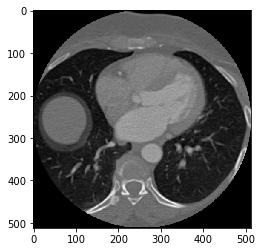

In [4]:

single=X_data[0]
print(single.shape)
print(single.dtype)
pyplot.imshow(single, cmap='gray')
print(Y_data[0])

In [5]:
shuffledIdxs = np.arange(X_data.shape[0])
random.shuffle(shuffledIdxs)

In [6]:
print(shuffledIdxs)

[ 4429 22102 19278 ... 25412 14952 12643]


In [7]:
X = X_data[shuffledIdxs,:,:]

In [8]:
Y=Y_data[shuffledIdxs,:]

(512, 512)
(33688, 512, 512)
float32
[105 118 233 207]


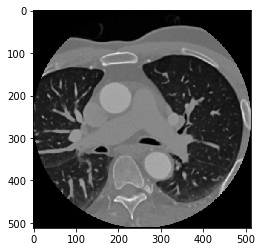

In [10]:
single=X[0]
print(single.shape)
print(X.shape)

print(single.dtype)
pyplot.imshow(single, cmap='gray')
print(Y[0])

In [11]:
print("X min:", np.min(X))
print("X max:", np.max(X))
print("Y min:", np.min(Y))
print("Y max:", np.max(Y))

X min: 0.0
X max: 4095.0
Y min: -2
Y max: 513


In [12]:
X=np.save('X.npy',X) 
Y=np.save('Y.npy',Y) 

In [3]:
X=np.load('X.npy',mmap_mode="r+") 
Y=np.load('Y.npy',mmap_mode="r+") 

(512, 512)
(33688, 512, 512)
float32
[105 118 233 207]
X min: 0.0
X max: 4095.0
Y min: -2
Y max: 513


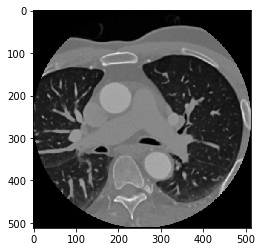

In [4]:
single=X[0]
print(single.shape)
print(X.shape)

print(single.dtype)
pyplot.imshow(single, cmap='gray')
print(Y[0])
print("X min:", np.min(X))
print("X max:", np.max(X))
print("Y min:", np.min(Y))
print("Y max:", np.max(Y))

In [5]:
# Normalize
normMin = np.min(X)
X -= normMin
normMax = np.max(X)
X = X / normMax
X -= 0.5

YnormMin = np.min(Y)
Y -= YnormMin
YnormMax = np.max(Y)
Y = Y / YnormMax
Y -= 0.5

In [ ]:
from sklearn import preprocessing
normalized_X = preprocessing.normalize(X_data)

In [8]:
print(np.max(X))
print(np.min(X))

0.5
-0.5


In [9]:
NX=np.save('NX.npy',X) 


In [5]:
Y=np.load('Y.npy',mmap_mode="r+") 
print(Y[0])
print("Y min:", np.min(Y))
print("Y max:", np.max(Y))

[105 118 233 207]
Y min: -2
Y max: 513


In [6]:
normMin = np.min(Y)
Y -= normMin
normMax = np.max(Y)
Y = Y / normMax
Y -= 0.5

In [7]:
NY=np.save('NY.npy',Y) 

In [8]:
print(np.max(Y))
print(np.min(Y))

0.5
-0.5


In [4]:
NX=np.load('NX.npy',mmap_mode="r+") 
NY=np.load('NY.npy',mmap_mode="r+") 


In [5]:
print(NX.shape)
print(NY.shape)

(33688, 512, 512)
(33688, 4)


In [6]:
trainPct = 0.90
numTraining = int(np.floor(trainPct * NX.shape[0]))

NX=np.reshape(NX,(33688,512,512,1))

In [7]:
print(NX.shape)


(33688, 512, 512, 1)


In [8]:
X_train = NX[0:numTraining,:,:,:]
print(NX.shape)


Y_train = NY[0:numTraining]

X_test = NX[numTraining:,:,:,:]
print(X_test.shape)


Y_test = NY[numTraining:]



(33688, 512, 512, 1)
(3369, 512, 512, 1)


In [10]:
print(X_test.shape)
print(X_train.shape)
print(Y_test.shape)
print(Y_train.shape)


(3369, 512, 512, 1)
(30319, 512, 512, 1)
(3369, 4)
(30319, 4)


In [11]:
X_test=np.save('X_test.npy',X_test) 
X_train=np.save('X_train.npy',X_train) 
Y_test=np.save('Y_test.npy',Y_test)
Y_train=np.save('Y_train.npy',Y_train) 

In [5]:
X_train=np.load('X_train.npy',mmap_mode="r+") 
X_test=np.load('X_test.npy',mmap_mode="r+") 
Y_train=np.load('Y_train.npy',mmap_mode="r+") 
Y_test=np.load('Y_test.npy',mmap_mode="r+") 


In [6]:
Y_test.shape

(3369, 4)

In [9]:
# print("Training sample size: {}".format(trainPct))


models = Sequential()


# Keras model with two hidden layer with 10 neurons each 
models.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(512,512,1),activation='relu'))    # Input layer => input_shape should be explicitly designated
models.add(MaxPool2D(pool_size=(2,2)))

models.add(Conv2D(filters=128,kernel_size=(4,4),activation='relu'))    # Input layer => input_shape should be explicitly designated
models.add(MaxPool2D(pool_size=(2,2)))

models.add(Conv2D(filters=64,kernel_size=(4,4),activation='relu'))    # Input layer => input_shape should be explicitly designated
models.add(MaxPool2D(pool_size=(2,2)))

models.add(Conv2D(filters=128,kernel_size=(4,4),activation='relu'))    # Input layer => input_shape should be explicitly designated
models.add(MaxPool2D(pool_size=(2,2)))

models.add(Conv2D(filters=32,kernel_size=(4,4),activation='relu'))    # Input layer => input_shape should be explicitly designated
models.add(MaxPool2D(pool_size=(2,2)))

models.add(Flatten())
models.add(Dense(32,activation='relu'))
models.add(Dense(1))




models.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse']) 


results = models.evaluate(X_train, Y_train)
print("Training before results for model")
print(models.metrics_names)     # list of metric names the model is employing
print(results)                 # actual figure of metrics computed


models.fit(X_train, Y_train ,epochs = 10, verbose = 10)


results = models.evaluate(X_train, Y_train)
print("Training results for model ")
print(models.metrics_names)     # list of metric names the model is employing
print(results)                 # actual figure of metrics computed

results = models.evaluate(X_test, Y_test)

print("Test results for model")
print(models.metrics_names)     # list of metric names the model is employing
print(results)                 # actual figure of metrics computed



ResourceExhaustedError:  OOM when allocating tensor with shape[32,32,509,509] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node sequential_2/conv2d_6/Conv2D (defined at <ipython-input-9-f1723b077142>:30) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_test_function_562]

Function call stack:
test_function


In [ ]:
def predict(img, verbose = True):
    tmp = img
    tmp -= normMin
    tmp = tmp/normMax - 0.5
    print(tmp.shape)
    tmp=np.expand_dims(tmp, axis=0)
    print(tmp.shape)
    x1 = models[0].predict(tmp)
    y1 = models[1].predict(tmp)
    x2 = models[2].predict(tmp)
    y2 = models[3].predict(tmp)
    
    x1= ((x1+0.5)*Y1normMax)+Y1normMin
    y1= ((y1+0.5)*Y2normMax)+Y2normMin
    x2= ((x2+0.5)*Y3normMax)+Y3normMin
    y2= ((y2+0.5)*Y4normMax)+Y4normMin
    
    x1 = int(round(x1.flatten()[0]))
    x1 = min(511, x1)
    y1 = int(round(y1.flatten()[0]))
    y1 = min(511, y1)
    x2 = int(round(x2.flatten()[0]))
    x2 = min(511, x2)
    y2 = int(round(y2.flatten()[0]))
    y2 = min(511, y2)
    
    if verbose:
        print("Predicted: {},{},{},{}".format(x1,y1,x2,y2))
    
    return x1, y1, x2, y2
#     img[x1, y1:y2] *= 0
#     img[x2, y1:y2] *= 0
#     img[x1:x2, y1] *= 0
#     img[x1:x2, y2] *= 0
    
    
    
#     x = np.arange(512)
    
#     fig = pyplot.figure(dpi=300)
#     pyplot.axes().set_aspect('equal', 'datalim')
#     pyplot.set_cmap(pyplot.gray())
#     pyplot.pcolormesh(x, x, np.flipud(img))
    
#     xc, yc, w, h = calculateCoordsAndDims(x1,y1,x2,y2)
# #     ax=fig.add_axes([0,0,1,1])
#     ax = fig.axes[0]
#     ax.add_patch(
#     patches.Rectangle(
#             (xc, yc),   # (x,y)
#             w,          # width
#             h,          # height
#             edgecolor='b',    
#             fill=False
#         )
#     )

In [ ]:
def analyse(path):
    # read the file
    ds = pydicom.read_file(path,force=True)
    # store the raw image data
    ds.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
    img = ds.pixel_array
    
    #ground truth 
    x1_truth, y1_truth, x2_truth, y2_truth = calculate(path+".json")
    print("True Values: {},{},{},{}".format(x1_truth,y1_truth,x2_truth,y2_truth))
    
    x = np.arange(512)
    
    fig = pyplot.figure(dpi=300)
    pyplot.axes().set_aspect('equal', 'datalim')
    pyplot.set_cmap(pyplot.gray())
    pyplot.pcolormesh(x,x,np.flipud(img))
    
    
    xc, yc, w, h = calculateCoordsAndDims(x1_truth,y1_truth,x2_truth,y2_truth)
#     ax=fig.add_axes([0,0,1,1])
    ax = fig.axes[0]
    ax.add_patch(
    patches.Rectangle(
            (xc, yc),   # (x,y)
            w,          # width
            h,          # height
            edgecolor='r',    
            fill=False
        )
    )
    
    # prediction
    
    x1_pred, y1_pred, x2_pred, y2_pred = predict(img)
    
    xc, yc, w, h = calculateCoordsAndDims(x1_pred, y1_pred, x2_pred, y2_pred)
    
    ax.add_patch(
    patches.Rectangle(
            (xc, yc),   # (x,y)
            w,          # width
            h,          # height
            edgecolor='b',    
            fill=False
        )
    )
    
    print("IoU: {}".format(calcIoU(x1_truth, y1_truth, x2_truth, y2_truth,x1_pred, y1_pred, x2_pred, y2_pred)))
    

In [ ]:
# Convert from coordinates to plottable points
def calculateCoordsAndDims(x1,y1,x2,y2):
    x = x1
    y = 512-y2
    width = x2-x1
    height = y2-y1
    return x, y, width, height

In [ ]:
def calcIoU(x1_trn, y1_trn, x2_trn, y2_trn, x1_tst, y1_tst, x2_tst, y2_tst):
    W = min(x2_tst,x2_trn)-max(x1_tst, x1_trn)
    H = min(y2_tst,y2_trn)-max(y1_tst, y1_trn)
#     print(x1_trn, y1_trn, x2_trn, y2_trn, x1_tst, y1_tst, x2_tst, y2_tst)
#     print(W)
#     print(H)
    totalArea = 0
    _, _, w, h = calculateCoordsAndDims(x1_trn, y1_trn, x2_trn, y2_trn)
    totalArea += w*h
    _, _, w, h = calculateCoordsAndDims(x1_tst, y1_tst, x2_tst, y2_tst)
    totalArea += w*h
    totalArea -= W*H
    
    if W<0 or H<0:
        return 0
    return (W * H)/totalArea

In [ ]:


# analyse(os.getcwd()+"\\CCTA-DICOMS\\S012\\S012-00074.dcm")

# predict(os.getcwd()+"\\CCTA-DICOMS\\S012\\S012-00074.dcm")
# analyse(os.getcwd()+"\\CCTA-DICOMS\\S024\\S024-00007.dcm")

analyse('/media/ccta/a3ee3238-d74c-4a4f-9c7f-afc98e547c81/Ahmed Fawzi/internship/CCTA-DICOMS/S026/S026-00053.dcm')
# analyse(os.getcwd()+"\\CCTA-DICOMS\\S033\\S033-00005.dcm")
# analyse(os.getcwd()+"\\CCTA-DICOMS\\S013\\S013-00042.dcm")

# predict(os.getcwd()+"\\CCTA-DICOMS\\S024\\S024-00007.dcm")


In [ ]:
X.shape

In [ ]:
def calculateIoUforImages(X, Y1, Y2, Y3, Y4):
    sm = 0
    for i in range(X.shape[0]):
        img = X[i,:]
        x1_pred, y1_pred, x2_pred, y2_pred = predict(img, False)
        x1, y1, x2, y2 = Y1[i], Y2[i], Y3[i], Y4[i]
        x1= ((x1+0.5)*Y1normMax)+Y1normMin
        y1= ((y1+0.5)*Y2normMax)+Y2normMin
        x2= ((x2+0.5)*Y3normMax)+Y3normMin
        y2= ((y2+0.5)*Y4normMax)+Y4normMin
        sm += calcIoU(x1_pred, y1_pred, x2_pred, y2_pred,x1, y1, x2, y2)
    return sm/X.shape[0]    

In [ ]:
calculateIoUforImages(X_train,Y1_train,Y2_train,Y3_train,Y4_train)

In [ ]:
calculateIoUforImages(X_test,Y1_test,Y2_test,Y3_test,Y4_test)

In [ ]:
X_train.shape